In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Increase width of notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Feature Engineering

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Feature Engineering</h1>
</div>

In [3]:
#Import dataset
df = pd.read_csv("datasets/houseprice.csv")

In [4]:
#Columns to subset dataset
cols_to_keep = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtQual','GarageCond', 'MasVnrType'
]
target_var = 'SalePrice'

## Missing Value Imputation

In [5]:
#Import modules
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

In [6]:
#Initialize imputation columns
cols_to_keep_impute = [col for col in cols_to_keep if col not in ['BsmtQual','GarageCond', 'MasVnrType', 'SalePrice']]

In [7]:
#Check for missing values
df[cols_to_keep_impute].isnull().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [8]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[cols_to_keep_impute], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.3,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((1022, 9), (438, 9))

### Mean/Median/Mode

#### Same Type for Each Column

In [9]:
# Create an instance of SimpleImputer with median
imputer = SimpleImputer(strategy='median')

#Fit imputer to train set
imputer.fit(X_train[cols_to_keep_impute])

SimpleImputer(strategy='median')

In [10]:
#Let's see what the imputer learnt
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [11]:
#Validate with actual data
X_train[cols_to_keep_impute].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [12]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train)
X_test_arr = imputer.transform(X_test)
X_train_arr

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [13]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=cols_to_keep_impute)
X_test_imputed = pd.DataFrame(X_test_arr, columns=cols_to_keep_impute)

In [14]:
X_train_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [15]:
X_test_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Different Types for Different Columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5d9beb6a0>,
      dtype=object)

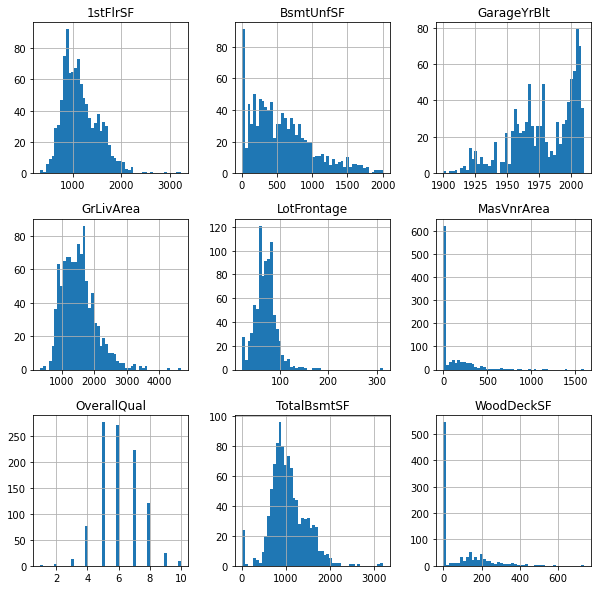

In [16]:
#Check distributions for determining type of imputation
X_train.hist(bins=50, figsize=(10,10))

In [17]:
#Impute LotFrontage with Mean
mean_features = ['LotFrontage']

#Impute MasVnrArea and GarageYrBlt with Median
median_features = ['MasVnrArea', 'GarageYrBlt']

#Add remainder to return all columns of dataframe
preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), mean_features),
    ('median_imputer', SimpleImputer(strategy='median'), median_features)
], remainder='passthrough')

In [18]:
#Fit preprocessor
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [19]:
#Impute the data
X_train_arr = preprocessor.transform(X_train)
X_test_arr = preprocessor.transform(X_test)
X_train_arr

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [20]:
#For converting into dataframe, the order of columns is important
preprocessor.transformers_

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

In [21]:
#Convert into list
non_impute_cols = [cols_to_keep_impute[c] for c in [0, 1, 2, 3, 4, 5]]
non_impute_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [22]:
#Convert into dataframe
X_train_imputed = pd.DataFrame(X_train_arr,
             columns=mean_features+median_features+non_impute_cols
            ).head()
X_test_imputed = pd.DataFrame(X_test_arr,
             columns=mean_features+median_features+non_impute_cols
            ).head()

In [23]:
X_train_imputed.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
dtype: int64

In [24]:
X_test_imputed.isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
dtype: int64

### Arbitrary Value Imputation

In [25]:
# Create an instance of SimpleImputer with constant value
imputer = SimpleImputer(strategy='constant',
                       fill_value=449)

#Fit imputer to train set
imputer.fit(X_train[cols_to_keep_impute])

SimpleImputer(fill_value=449, strategy='constant')

In [26]:
#Let's see what the imputer learnt
imputer.statistics_

array([449., 449., 449., 449., 449., 449., 449., 449., 449.])

In [27]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train)
X_test_arr = imputer.transform(X_test)
X_train_arr

array([[   7., 1057., 1057., ...,  449.,  573., 1998.],
       [   6., 1291., 1291., ...,  449.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  449.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  449.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [28]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=cols_to_keep_impute)
X_test_imputed = pd.DataFrame(X_test_arr, columns=cols_to_keep_impute)

In [29]:
X_train_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [30]:
X_test_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Frequent Category Imputation

In [31]:
# Create an instance of SimpleImputer with constant value
imputer = SimpleImputer(strategy='most_frequent')

#Fit imputer to train set
imputer.fit(X_train[cols_to_keep_impute])

SimpleImputer(strategy='most_frequent')

In [32]:
#Let's see what the imputer learnt
imputer.statistics_

array([   5.,    0.,  864.,  864.,    0.,    0.,   60.,    0., 2005.])

In [33]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train)
X_test_arr = imputer.transform(X_test)
X_train_arr

array([[   7., 1057., 1057., ...,   60.,  573., 1998.],
       [   6., 1291., 1291., ...,   60.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 2005.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   60.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [34]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=cols_to_keep_impute)
X_test_imputed = pd.DataFrame(X_test_arr, columns=cols_to_keep_impute)

In [35]:
X_train_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [36]:
X_test_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### KNN Imputation (Multivariate)

In [37]:
# Create an instance of KNNImputer
imputer = KNNImputer(
    n_neighbors=5, #Number of neighbours K
    weights='distance', #Weighting factor
    metric='nan_euclidean', #Metric to find the neighbours
    add_indicator=False, #Whether to add missing indicator
)

#Fit imputer to train set
imputer.fit(X_train[cols_to_keep_impute])

KNNImputer(weights='distance')

In [38]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train)
X_test_arr = imputer.transform(X_test)
X_train_arr

array([[   7.        , 1057.        , 1057.        , ...,   76.2672679 ,
         573.        , 1998.        ],
       [   6.        , 1291.        , 1291.        , ...,   70.99899824,
           0.        , 1996.        ],
       [   5.        ,  858.        ,  858.        , ...,   50.        ,
           0.        , 1982.7557242 ],
       ...,
       [   6.        ,    0.        , 1318.        , ...,   68.        ,
           0.        , 1978.        ],
       [   7.        , 1374.        , 1557.        , ...,   46.60155778,
          18.        , 2003.        ],
       [   7.        , 1195.        , 1195.        , ...,   58.        ,
          30.        , 1998.        ]])

In [39]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=cols_to_keep_impute)
X_test_imputed = pd.DataFrame(X_test_arr, columns=cols_to_keep_impute)

In [40]:
X_train_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [41]:
X_test_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [42]:
#Reset index to compare data
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [43]:
#Imputed Values
X_train_imputed[X_train['LotFrontage'].isnull()]['LotFrontage']

0       76.267268
1       70.998998
7       77.836679
10      76.144379
13      61.848673
          ...    
1002    69.465059
1003    61.938993
1015    85.176491
1016    68.263190
1020    46.601558
Name: LotFrontage, Length: 189, dtype: float64

In [44]:
#Mean value of variable
X_train['LotFrontage'].mean()

69.66866746698679

## One-Hot Encoding for Categorical Variables

In [33]:
#Import module
from sklearn.preprocessing import OneHotEncoder

In [46]:
#Initialize one-hot-encoding columns
cols_to_keep_ohe = ['BsmtQual','GarageCond', 'MasVnrType']

In [47]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[cols_to_keep_ohe], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.3,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [48]:
#Check for missing values
X_train.isnull().sum()

BsmtQual      24
GarageCond    54
MasVnrType     5
dtype: int64

In [49]:
#Train-test split (for catgeorical variables)
X_train_ohe_init = X_train[["MasVnrType","GarageCond", "BsmtQual"]]
X_test_ohe_init = X_test[["MasVnrType","GarageCond", "BsmtQual"]]

X_train_ohe_init.shape, X_test_ohe_init.shape

((1022, 3), (438, 3))

In [50]:
#Create encoder instance
ohe_transorm = OneHotEncoder(categories='auto',
                       drop='first', #This drops the first variable
                       sparse=False,
                       handle_unknown='error') #For dealing with rare labels

ohe_transorm.fit(X_train_ohe_init.fillna('NotPresent'))

OneHotEncoder(drop='first', sparse=False)

In [51]:
#Check learned categories
ohe_transorm.categories_

[array(['BrkCmn', 'BrkFace', 'None', 'NotPresent', 'Stone'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'NotPresent', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'NotPresent', 'TA'], dtype=object)]

In [52]:
#Get feature names
feature_names = ohe_transorm.get_feature_names_out()
feature_names

array(['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_NotPresent',
       'MasVnrType_Stone', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_NotPresent', 'GarageCond_Po', 'GarageCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NotPresent', 'BsmtQual_TA'],
      dtype=object)

In [53]:
#Transform train set and test set
X_train_ohe_arr = ohe_transorm.transform(X_train_ohe_init.fillna('NotPresent'))
X_test_ohe_arr = ohe_transorm.transform(X_test_ohe_init.fillna('NotPresent'))

In [54]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_ohe = pd.DataFrame(X_train_ohe_arr, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe_arr, columns=feature_names)

In [55]:
X_train_ohe.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [56]:
X_test_ohe.head()

,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Outlier Handling

One of the most common ways to handle outliers is to perform capping using the *Interquartile Range Proximity* rule. Another way is to impute the outliers by *treating them as missing values*.

In [34]:
#Import module
import seaborn as sns

In [58]:
#Initialize outlier handling columns
col_to_keep_out_hand = ['LotFrontage']

In [59]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[col_to_keep_out_hand], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.3,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((1022, 1), (438, 1))

In [60]:
#Validate train and test shape for explanatory variables
X_train.shape, X_test.shape

((1022, 1), (438, 1))

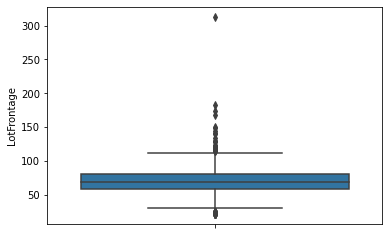

In [61]:
#Check for outliers using boxplot
sns.boxplot(y=X_train["LotFrontage"])

In [62]:
#Get interquartile range and defined boundaries
IQR = X_train["LotFrontage"].quantile(0.75) - X_train["LotFrontage"].quantile(0.25)
lower_boundary = X_train["LotFrontage"].quantile(0.25) - (IQR * 1.5)
upper_boundary = X_train["LotFrontage"].quantile(0.75) + (IQR * 1.5)

In [63]:
#Replace outliers by maximum and minimum limits
X_train_out_hand = X_train.copy(deep=True)
X_train_out_hand['LotFrontage'] = np.where(X_train_out_hand['LotFrontage'] > upper_boundary, upper_boundary,
                        np.where(X_train_out_hand['LotFrontage'] < lower_boundary, lower_boundary,
                        X_train_out_hand['LotFrontage']))

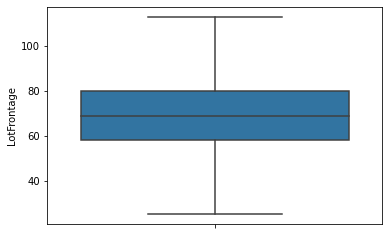

In [64]:
#Check for outliers using boxplot
sns.boxplot(y=X_train_out_hand["LotFrontage"])

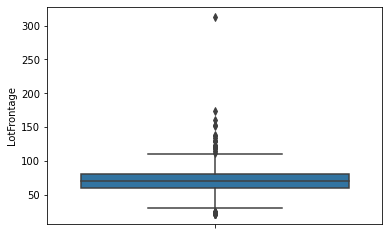

In [65]:
#Check for outliers using boxplot for test set
sns.boxplot(y=X_test["LotFrontage"])

In [66]:
#Apply transformation on test set
X_test_out_hand = X_test.copy(deep=True)
X_test_out_hand['LotFrontage'] = np.where(X_test_out_hand['LotFrontage'] > upper_boundary, upper_boundary,
                        np.where(X_test_out_hand['LotFrontage'] < lower_boundary, lower_boundary,
                        X_test_out_hand['LotFrontage']))

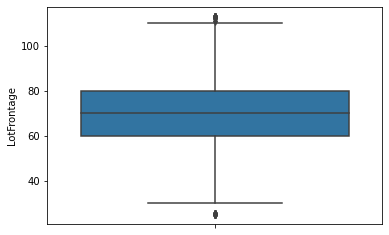

In [67]:
#Check for outliers using boxplot for test set - Notice that some outliers still remain!
sns.boxplot(y=X_test_out_hand["LotFrontage"])

## Feature Scaling

Common ways for feature scaling include *standardization*, *min-max scaling* and *robust scaling*. We'll explore each of these in detail.

In [35]:
#Import modules
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [69]:
#Initialize scaling columns
cols_to_keep_scaling = [col for col in cols_to_keep if col not in ['BsmtQual','GarageCond', 'MasVnrType', 'SalePrice']]

In [70]:
#Check summary of data
df[cols_to_keep_scaling].describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000
mean,6.099315,1057.429452,1162.626712,1515.463699,94.244521,567.240411,70.049958,103.685262,1978.506164
std,1.382997,438.705324,386.587738,525.480383,125.338794,441.866955,24.284752,181.066207,24.689725
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000,21.000000,0.000000,1900.000000
25%,5.000000,795.750000,882.000000,1129.500000,0.000000,223.000000,59.000000,0.000000,1961.000000
50%,6.000000,991.500000,1087.000000,1464.000000,0.000000,477.500000,69.000000,0.000000,1980.000000
75%,7.000000,1298.250000,1391.250000,1776.750000,168.000000,808.000000,80.000000,166.000000,2002.000000
max,10.000000,6110.000000,4692.000000,5642.000000,857.000000,2336.000000,313.000000,1600.000000,2010.000000


In [71]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[cols_to_keep_scaling], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.3,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((1022, 9), (438, 9))

### Standardization

In [72]:
#Initialize the scaler
stdscaler = StandardScaler()

#Fit to train set
stdscaler.fit(X_train)

StandardScaler()

In [73]:
#Transform train and test sets
X_train_scaled_arr = stdscaler.transform(X_train)
X_test_scaled_arr = stdscaler.transform(X_test)

In [74]:
#Check mean of columns
stdscaler.mean_

array([   6.07925636, 1055.34344423, 1161.7221135 , 1522.13796477,
         94.85225049,  565.99217221,   69.66866747,  103.55358899,
       1978.01239669])

In [75]:
#Check standard deviation of columns
stdscaler.scale_

array([  1.35722328, 410.03467283, 373.80312205, 517.55705467,
       128.33428817, 432.82859754,  23.06399449, 181.52439648,
        24.97320571])

In [76]:
#Encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test.columns)

In [77]:
#Check how data looks like
X_train_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,8.330000e+02,1.017000e+03,9.680000e+02
mean,-3.795616e-16,2.666925e-17,1.314045e-16,-9.016488e-17,-6.398448e-17,-8.256062e-18,2.225777e-16,-3.177290e-16,-3.755031e-16
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000601e+00,1.000492e+00,1.000517e+00
min,-3.742388e+00,-2.573791e+00,-2.214326e+00,-2.295666e+00,-7.391029e-01,-1.307659e+00,-2.110158e+00,-5.704665e-01,-3.123844e+00
25%,-7.951944e-01,-6.129810e-01,-7.429636e-01,-7.378664e-01,-7.391029e-01,-7.762707e-01,-5.059257e-01,-5.704665e-01,-6.812260e-01
50%,-5.839596e-02,-1.544831e-01,-1.784953e-01,-8.334920e-02,-7.391029e-01,-1.836574e-01,-2.899183e-02,-5.704665e-01,3.954652e-02
75%,6.784025e-01,5.399703e-01,6.133654e-01,5.175507e-01,5.699782e-01,5.660620e-01,4.479420e-01,3.660467e-01,9.204907e-01
max,2.888798e+00,5.245060e+00,5.527717e+00,6.093748e+00,4.995919e+00,3.317729e+00,1.055027e+01,8.243776e+00,1.280877e+00


In [78]:
#Check how data looks like
X_test_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,368.000000,435.000000,411.000000
mean,0.049264,0.016958,0.008067,-0.042986,-0.015785,0.009613,0.053953,0.002421,0.066339
std,1.061274,1.217792,1.110061,1.049624,0.919666,1.068095,1.163300,0.991534,0.959704
min,-2.268791,-2.573791,-1.815721,-1.936285,-0.739103,-1.307659,-2.110158,-0.570467,-2.723415
25%,-0.795194,-0.671513,-0.781085,-0.780857,-0.739103,-0.808616,-0.419210,-0.570467,-0.641183
50%,-0.058396,-0.158141,-0.240025,-0.182855,-0.544299,-0.237951,0.014366,-0.570467,0.119632
75%,0.678402,0.675325,0.609353,0.457171,0.569978,0.528518,0.447942,0.266887,1.000577
max,2.888798,12.327388,9.444217,7.960208,5.938769,4.089397,10.550268,5.571959,1.240834


### Min-Max Scaling

In [79]:
#Initialize the scaler
minmaxscaler = MinMaxScaler()

#Fit to train set
minmaxscaler.fit(X_train)

MinMaxScaler()

In [80]:
#Transform train and test sets
X_train_scaled_arr = minmaxscaler.transform(X_train)
X_test_scaled_arr = minmaxscaler.transform(X_test)

In [81]:
#Check minimum values
minmaxscaler.min_

array([ -0.11111111,   0.        ,  -0.1154112 ,  -0.07692308,
         0.        ,   0.        ,  -0.07191781,   0.        ,
       -17.27272727])

In [82]:
#Check maximum values
minmaxscaler.data_max_

array([  10., 3206., 3228., 4676.,  736., 2002.,  313., 1600., 2010.])

In [83]:
#Check range
minmaxscaler.data_range_

array([   9., 3206., 2894., 4342.,  736., 2002.,  292., 1600.,  110.])

In [84]:
#Encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test.columns)

In [85]:
#Check how data looks like
X_train_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,833.000000,1017.000000,968.000000
mean,0.564362,0.329178,0.286013,0.273638,0.128875,0.282713,0.166674,0.064721,0.709204
std,0.150876,0.127959,0.129228,0.119256,0.174453,0.216304,0.079034,0.113509,0.227147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.250780,0.190048,0.185686,0.000000,0.114885,0.126712,0.000000,0.554545
50%,0.555556,0.309420,0.262958,0.263703,0.000000,0.243007,0.164384,0.000000,0.718182
75%,0.666667,0.398238,0.365238,0.335329,0.228261,0.405095,0.202055,0.106250,0.918182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#Check how data looks like
X_test_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,368.000000,435.000000,411.000000
mean,0.571791,0.331346,0.287055,0.268515,0.126123,0.284792,0.170935,0.064996,0.724265
std,0.160043,0.155751,0.143381,0.125113,0.160360,0.230920,0.091885,0.112492,0.217881
min,0.222222,0.000000,0.051486,0.042837,0.000000,0.000000,0.000000,0.000000,0.090909
25%,0.444444,0.243294,0.185124,0.180562,0.000000,0.107892,0.133562,0.000000,0.563636
50%,0.555556,0.308952,0.255010,0.251842,0.033967,0.231269,0.167808,0.000000,0.736364
75%,0.666667,0.415549,0.364720,0.328132,0.228261,0.396978,0.202055,0.095000,0.936364
max,1.000000,1.905802,1.505874,1.222478,1.164402,1.166833,1.000000,0.696875,0.990909


### Robust Scaling

In [87]:
#Initialize the scaler
robustscaler = RobustScaler()

#Fit to train set
robustscaler.fit(X_train)

RobustScaler()

In [88]:
#Transform train and test sets
X_train_scaled_arr = robustscaler.transform(X_train)
X_test_scaled_arr = robustscaler.transform(X_test)

In [89]:
#Check median values of columns
robustscaler.center_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [90]:
#Check IQR values of columns
robustscaler.scale_

array([  2.  , 472.75, 507.  , 649.75, 168.  , 581.  ,  22.  , 170.  ,
        40.  ])

In [91]:
#Encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test.columns)

In [92]:
#Check how data looks like
X_train_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,833.000000,1017.000000,968.000000
mean,0.039628,0.133989,0.131602,0.066392,0.564597,0.136820,0.030394,0.609139,-0.024690
std,0.678944,0.867764,0.737645,0.796938,0.764269,0.745337,1.048993,1.068316,0.624653
min,-2.500000,-2.098361,-1.500986,-1.762216,0.000000,-0.837349,-2.181818,0.000000,-1.975000
25%,-0.500000,-0.397673,-0.416174,-0.521354,0.000000,-0.441480,-0.500000,0.000000,-0.450000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.602327,0.583826,0.478646,1.000000,0.558520,0.500000,1.000000,0.550000
max,2.000000,4.683236,4.207101,4.920354,4.380952,2.608434,11.090909,9.411765,0.775000


In [93]:
#Check how data looks like
X_test_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,368.000000,435.000000,411.000000
mean,0.073059,0.148698,0.137549,0.032151,0.552539,0.143981,0.086957,0.611724,0.016727
std,0.720193,1.056239,0.818430,0.836076,0.702528,0.795701,1.219561,1.058750,0.599172
min,-1.500000,-2.098361,-1.207101,-1.475952,0.000000,-0.837349,-2.181818,0.000000,-1.725000
25%,-0.500000,-0.448440,-0.444280,-0.555598,0.000000,-0.465577,-0.409091,0.000000,-0.425000
50%,0.000000,-0.003173,-0.045365,-0.079261,0.148810,-0.040448,0.045455,0.000000,0.050000
75%,0.500000,0.719725,0.580868,0.430550,1.000000,0.530551,0.500000,0.894118,0.600000
max,2.000000,10.826018,7.094675,6.407080,5.101190,3.183305,11.090909,6.558824,0.750000


# Supervised Learning: Algorithms for Regression

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Regression</h1>
</div>

## Data

In [10]:
#Import dataset
df = pd.read_csv("datasets/houseprice.csv")

In [510]:
#Columns to subset dataset
numeric_vars = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'
]
categ_vars = ['BsmtQual','GarageCond', 'MasVnrType']
target_var = 'SalePrice'

In [511]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_vars+categ_vars], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.2,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((1168, 12), (292, 12))

## Evaluation Metrics

In [512]:
#Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [513]:
#Initialize evaluation matrix
algorithms = ["LinReg", "LASSOReg", "RidgeReg", "ElasticNetReg", "PolynomialReg", "GAM", "SVR", "DecisionTree", \
              "RandomForest", "GradientBoosting", "AdaBoost","XGBoost", "LightGBM"]
eval_metrics = ["R2 Score","RMSE", "MAE", "MAPE"]

train_perf = pd.DataFrame(columns = algorithms, index=eval_metrics)
test_perf = pd.DataFrame(columns = algorithms, index=eval_metrics)

In [514]:
#Evaluation helper function
def get_evaluation_metrics(y_true, y_pred):
    
    #Evaluate the model using R2
    r2 = np.round(r2_score(y_true, y_pred),2)
    
    #Evaluate the model using RMSE
    error_rmse = np.round(np.sqrt(mean_squared_error(y_true, y_pred)),2)
    
    #Evaluate the model using MAE
    error_mae = np.round(mean_absolute_error(y_true, y_pred),2)
    
    #Evaluate the model using MAPE
    error_mape = np.round(100*mean_absolute_percentage_error(y_true, y_pred),2)

    return((r2, error_rmse, error_mae, error_mape))

## Feature Engineering

### Step 1: Simple Median Imputation

In [515]:
#Train-test split
X_train_impute_init = X_train[numeric_vars]
X_test_impute_init = X_test[numeric_vars]
X_train_impute_init.shape, X_test_impute_init.shape

((1168, 9), (292, 9))

In [516]:
#Check for missing values
X_train_impute_init[numeric_vars].isnull().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64

In [517]:
# Create an instance of SimpleImputer with median
imputer = SimpleImputer(strategy='median')

#Fit imputer to train set
imputer.fit(X_train_impute_init)

SimpleImputer(strategy='median')

In [518]:
#Let's see what the imputer learnt
imputer.statistics_

array([   6. ,  992. , 1092. , 1471.5,    0. ,  482.5,   69. ,    0. ,
       1979. ])

In [519]:
#Validate with actual data
X_train_impute_init.median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1092.0
GrLivArea      1471.5
WoodDeckSF        0.0
BsmtUnfSF       482.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [520]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train_impute_init)
X_test_arr = imputer.transform(X_test_impute_init)
X_train_arr

array([[   9., 1822., 1828., ...,   90.,  452., 2007.],
       [   5.,  894.,  894., ...,   60.,    0., 1962.],
       [   5.,  876.,  964., ...,   80.,    0., 1921.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [521]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=numeric_vars)
X_test_imputed = pd.DataFrame(X_test_arr, columns=numeric_vars)

In [522]:
X_train_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [523]:
X_test_imputed.isnull().sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
WoodDeckSF     0
BsmtUnfSF      0
LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Step 2: Outlier Handling

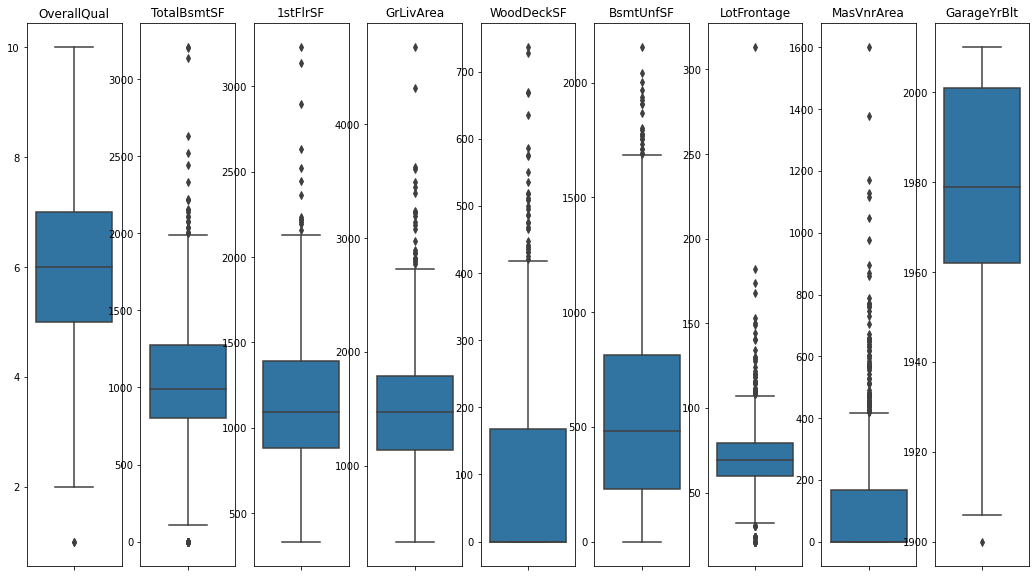

In [524]:
#Check for outliers using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_train_imputed[var])
    ax.set(ylabel = None)
    ax.set(title = var)

In [525]:
#Define function to get interquartile range and define boundaries
def get_boundaries(var):
    IQR = X_train_imputed[var].quantile(0.75) - X_train_imputed[var].quantile(0.25)
    lower_boundary = X_train_imputed[var].quantile(0.25) - (IQR * 1.5)
    upper_boundary = X_train_imputed[var].quantile(0.75) + (IQR * 1.5)
    return(lower_boundary, upper_boundary)

In [526]:
#Replace outliers by maximum and minimum limits
X_train_out_hand = X_train_imputed.copy(deep=True)
for var in numeric_vars:
    lower_boundary, upper_boundary = get_boundaries(var)
    X_train_out_hand[var] = np.where(X_train_out_hand[var] > upper_boundary, upper_boundary,
                            np.where(X_train_out_hand[var] < lower_boundary, lower_boundary,
                            X_train_out_hand[var]))

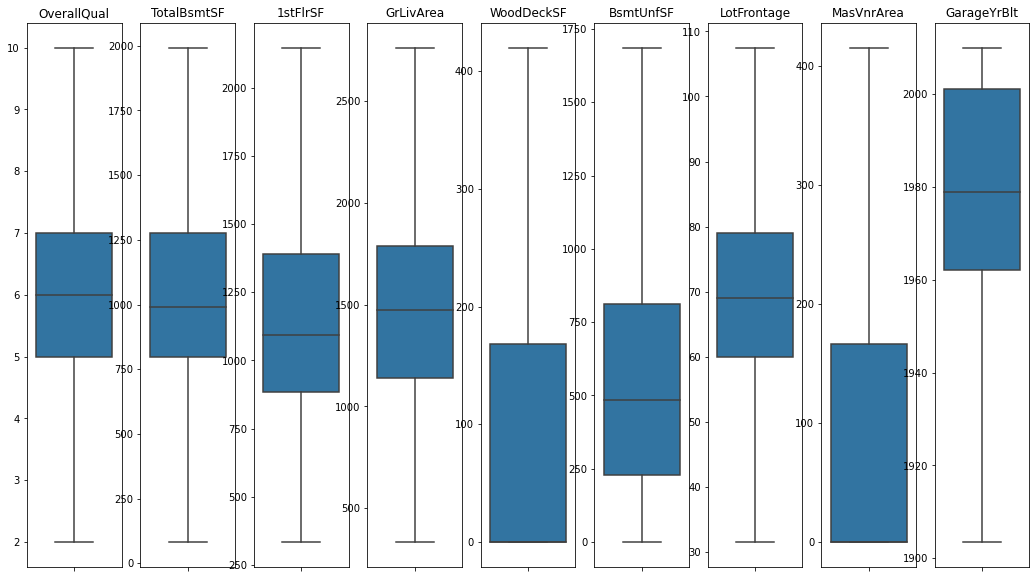

In [527]:
#Check for outliers using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_train_out_hand[var])
    ax.set(ylabel = None)
    ax.set(title = var)

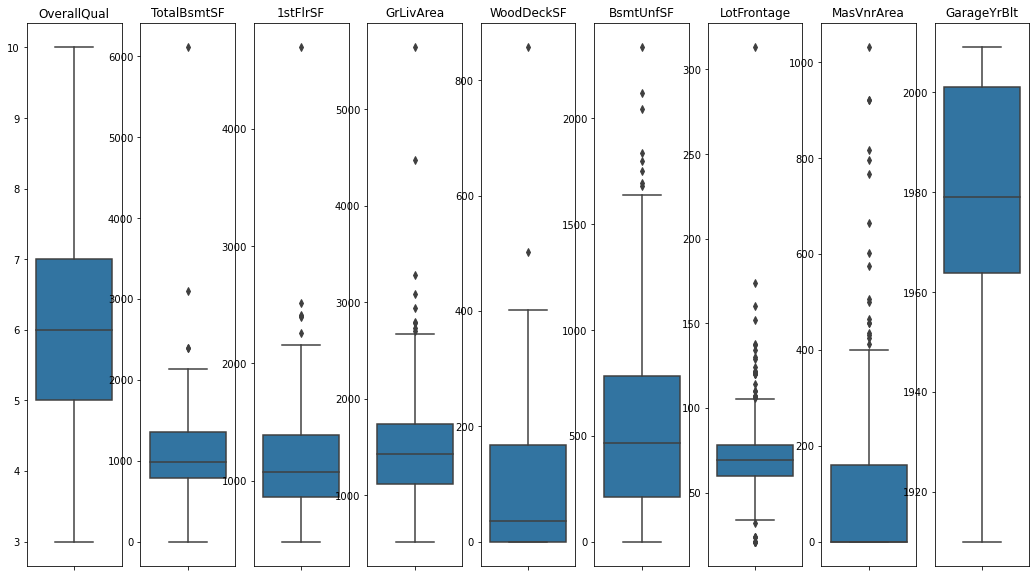

In [528]:
#Check for outliers in test set using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_test_imputed[var])
    ax.set(ylabel = None)
    ax.set(title = var)

In [529]:
#Apply transformation on test set
X_test_out_hand = X_test_imputed.copy(deep=True)
for var in numeric_vars:
    lower_boundary, upper_boundary = get_boundaries(var)
    X_test_out_hand[var] = np.where(X_test_out_hand[var] > upper_boundary, upper_boundary,
                            np.where(X_test_out_hand[var] < lower_boundary, lower_boundary,
                            X_test_out_hand[var]))

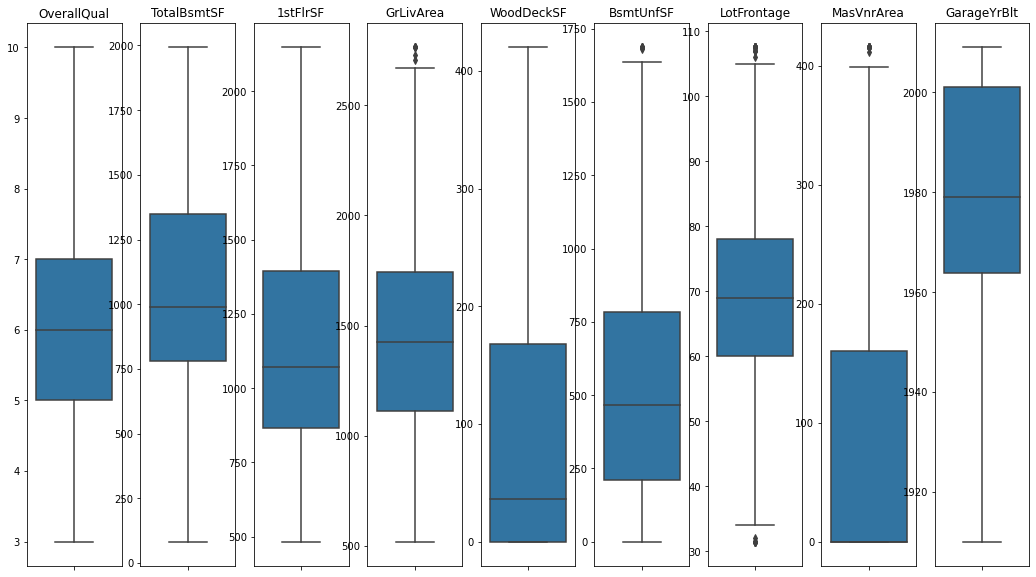

In [530]:
#Check for outliers in test set using boxplot - note that some outliers still exist!
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_test_out_hand[var])
    ax.set(ylabel = None)
    ax.set(title = var)

### Step 3: Minmax Feature Scaling

In [531]:
#Initialize the scaler
minmaxscaler = MinMaxScaler()

#Fit to train set
minmaxscaler.fit(X_train_out_hand)

MinMaxScaler()

In [532]:
#Transform train and test sets
X_train_scaled_arr = minmaxscaler.transform(X_train_out_hand)
X_test_scaled_arr = minmaxscaler.transform(X_test_out_hand)

In [533]:
#Check minimum values
minmaxscaler.min_

array([ -0.25      ,  -0.04319372,  -0.18421234,  -0.1375193 ,
         0.        ,   0.        ,  -0.41447368,   0.        ,
       -17.87323944])

In [534]:
#Check maximum values
minmaxscaler.data_max_

array([  10.   , 1992.5  , 2147.125, 2762.75 ,  420.   , 1686.125,
        107.5  ,  415.625, 2010.   ])

In [535]:
#Check range
minmaxscaler.data_range_

array([   8.   , 1910.   , 1813.125, 2428.75 ,  420.   , 1686.125,
         76.   ,  415.625,  106.5  ])

In [536]:
#Encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_out_hand.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_out_hand.columns)

In [537]:
#Check how data looks like
X_train_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.511023,0.506192,0.453948,0.483984,0.218801,0.335244,0.493184,0.215092,0.701279
std,0.170214,0.202409,0.197995,0.198188,0.282159,0.254753,0.223791,0.326485,0.227629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.303344,0.331446,0.000000,0.135221,0.375000,0.000000,0.549296
50%,0.500000,0.476178,0.418063,0.468348,0.000000,0.286159,0.493421,0.000000,0.708920
75%,0.625000,0.625000,0.582006,0.598868,0.400000,0.481133,0.625000,0.400000,0.915493
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [538]:
#Check how data looks like
X_test_scaled.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.518836,0.508359,0.453519,0.472828,0.217735,0.330875,0.500315,0.219200,0.717699
std,0.180589,0.218020,0.207263,0.200048,0.259865,0.261617,0.238464,0.316330,0.215253
min,0.125000,0.000000,0.082179,0.076583,0.000000,0.000000,0.000000,0.000000,0.061033
25%,0.375000,0.366361,0.292313,0.320844,0.000000,0.125139,0.375000,0.000000,0.565728
50%,0.500000,0.475131,0.407308,0.450232,0.086905,0.275780,0.493421,0.000000,0.708920
75%,0.625000,0.663874,0.584902,0.579825,0.400000,0.465120,0.611842,0.385564,0.915493
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990610


### Step 4: One-Hot Encode Categorical Variables

In [539]:
#Subset only categorical variables
X_train_ohe_init = X_train[categ_vars]
X_test_ohe_init = X_test[categ_vars]

X_train_ohe_init.shape, X_test_ohe_init.shape

((1168, 3), (292, 3))

In [540]:
#Check for missing values
X_train_ohe_init.isnull().sum()

BsmtQual      28
GarageCond    58
MasVnrType     6
dtype: int64

In [541]:
#Create encoder instance
ohe_transorm = OneHotEncoder(categories='auto',
                       drop='first', #This drops the first variable
                       sparse=False,
                       handle_unknown='error') #For dealing with rare labels

ohe_transorm.fit(X_train_ohe_init.fillna('NotPresent'))

OneHotEncoder(drop='first', sparse=False)

In [542]:
#Check learned categories
ohe_transorm.categories_

[array(['Ex', 'Fa', 'Gd', 'NotPresent', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'NotPresent', 'Po', 'TA'], dtype=object),
 array(['BrkCmn', 'BrkFace', 'None', 'NotPresent', 'Stone'], dtype=object)]

In [543]:
#Get feature names
feature_names = ohe_transorm.get_feature_names_out()
feature_names

array(['BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NotPresent', 'BsmtQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NotPresent',
       'GarageCond_Po', 'GarageCond_TA', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_NotPresent', 'MasVnrType_Stone'],
      dtype=object)

In [544]:
#Transform train set and test set
X_train_ohe_arr = ohe_transorm.transform(X_train_ohe_init.fillna('NotPresent'))
X_test_ohe_arr = ohe_transorm.transform(X_test_ohe_init.fillna('NotPresent'))

In [545]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_ohe = pd.DataFrame(X_train_ohe_arr, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe_arr, columns=feature_names)

In [546]:
X_train_ohe.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [547]:
X_test_ohe.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### Step 5: Join Numeric and Categorical Data

In [548]:
X_train_scaled.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,0.875,0.910733,0.823992,0.615131,0.000000,1.000000,0.769737,1.000000,0.971831
1,0.375,0.424869,0.308859,0.230571,0.000000,0.530210,0.375000,0.000000,0.549296
2,0.375,0.415445,0.347466,0.259393,0.000000,0.096671,0.638158,0.000000,0.164319
3,0.750,0.777749,0.747329,0.557900,0.357143,0.207577,0.493421,0.356090,0.924883
4,0.625,0.763613,0.665701,0.496963,1.000000,0.913930,1.000000,0.360902,0.915493


In [549]:
X_train_ohe.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [550]:
X_test_scaled.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,0.500,1.000000,1.000000,0.897993,0.000000,0.483950,0.493421,0.000000,0.671362
1,0.500,0.378796,0.344157,0.512198,0.000000,0.141152,0.625000,0.000000,0.352113
2,0.375,0.328010,0.355739,0.357797,0.000000,0.310772,0.493421,0.387368,0.436620
3,0.625,0.564136,0.453361,0.695008,0.685714,0.455482,0.677632,0.719398,0.690141
4,0.500,0.231675,0.105343,0.312095,0.000000,0.311365,0.000000,0.916692,0.633803


In [551]:
X_test_ohe.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotPresent,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [552]:
X_train_final = X_train_scaled.join(X_train_ohe)
X_test_final = X_test_scaled.join(X_test_ohe)

In [553]:
X_train_final.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_Fa,...,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.875,0.910733,0.823992,0.615131,0.000000,1.000000,0.769737,1.000000,0.971831,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.375,0.424869,0.308859,0.230571,0.000000,0.530210,0.375000,0.000000,0.549296,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.375,0.415445,0.347466,0.259393,0.000000,0.096671,0.638158,0.000000,0.164319,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.750,0.777749,0.747329,0.557900,0.357143,0.207577,0.493421,0.356090,0.924883,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.625,0.763613,0.665701,0.496963,1.000000,0.913930,1.000000,0.360902,0.915493,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [554]:
X_test_final.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_Fa,...,BsmtQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotPresent,GarageCond_Po,GarageCond_TA,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_NotPresent,MasVnrType_Stone
0,0.500,1.000000,1.000000,0.897993,0.000000,0.483950,0.493421,0.000000,0.671362,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.500,0.378796,0.344157,0.512198,0.000000,0.141152,0.625000,0.000000,0.352113,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.375,0.328010,0.355739,0.357797,0.000000,0.310772,0.493421,0.387368,0.436620,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.625,0.564136,0.453361,0.695008,0.685714,0.455482,0.677632,0.719398,0.690141,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.500,0.231675,0.105343,0.312095,0.000000,0.311365,0.000000,0.916692,0.633803,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Algorithms

### Simple Linear Regression

In [561]:
#Import Module
from sklearn.linear_model import LinearRegression

In [562]:
#Initialize and fit the model
regressor = LinearRegression()
regressor.fit(X_train_final, y_train)

LinearRegression()

In [563]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [564]:
#Evaluate the Model
train_perf["LinReg"] = get_evaluation_metrics(y_train,y_fit)
test_perf["LinReg"] = get_evaluation_metrics(y_test,y_pred)

In [565]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [566]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### LASSO Regression

In [567]:
#Import Module
from sklearn.linear_model import Lasso

In [568]:
#Initialize and fit the model
regressor = Lasso()
regressor.fit(X_train_final, y_train)

Lasso()

In [569]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [570]:
#Evaluate the Model
train_perf["LASSOReg"] = get_evaluation_metrics(y_train,y_fit)
test_perf["LASSOReg"] = get_evaluation_metrics(y_test,y_pred)

In [571]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [572]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### Ridge Regression 

In [573]:
#Import Module
from sklearn.linear_model import Ridge

In [574]:
#Initialize and fit the model
regressor = Ridge()
regressor.fit(X_train_final, y_train)

Ridge()

In [575]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [576]:
#Evaluate the Model
train_perf["RidgeReg"] = get_evaluation_metrics(y_train,y_fit)
test_perf["RidgeReg"] = get_evaluation_metrics(y_test,y_pred)

In [577]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [578]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### Elastic Net Regression

In [579]:
#Import Module
from sklearn.linear_model import ElasticNet

In [580]:
#Initialize and fit the model
regressor = ElasticNet()
regressor.fit(X_train_final, y_train)

ElasticNet()

In [581]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [582]:
#Evaluate the Model
train_perf["ElasticNetReg"] = get_evaluation_metrics(y_train,y_fit)
test_perf["ElasticNetReg"] = get_evaluation_metrics(y_test,y_pred)

In [583]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [584]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### Polynomial Regression

In [585]:
#Import Module
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [586]:
#Create polynomial features
poly_reg = PolynomialFeatures(degree = 4)
X_train_poly = poly_reg.fit_transform(X_train_final)
X_test_poly = poly_reg.transform(X_test_final)

In [587]:
#Initialize and fit the model
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression()

In [588]:
#Get predictions
y_fit = regressor.predict(X_train_poly)
y_pred = regressor.predict(X_test_poly)

In [589]:
#Evaluate the Model
train_perf["PolynomialReg"] = get_evaluation_metrics(y_train,y_fit)
test_perf["PolynomialReg"] = get_evaluation_metrics(y_test,y_pred)

In [590]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,NaN,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,NaN,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,NaN,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,NaN,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [591]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,NaN,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,NaN,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,NaN,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,NaN,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### Generalized Additive Models

In [592]:
#Import Module
# !pip install pyGam
from pygam import LinearGAM

In [593]:
#Initialize and fit the model
gam_model = LinearGAM()
gam_model.fit(X_train_final, y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + intercept,
   tol=0.0001, verbose=False)

In [594]:
#Get predictions
y_fit = gam_model.predict(X_train_final)
y_pred = gam_model.predict(X_test_final)

In [595]:
#Evaluate the Model
train_perf["GAM"] = get_evaluation_metrics(y_train,y_fit)
test_perf["GAM"] = get_evaluation_metrics(y_test,y_pred)

In [596]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,NaN,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,NaN,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,NaN,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,NaN,NaN,NaN,NaN,NaN,7.51,NaN


In [597]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,NaN,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,NaN,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,NaN,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,NaN,NaN,NaN,NaN,NaN,11.73,NaN


### Support Vector Regression

In [598]:
#Import Module
from sklearn.svm import SVR

In [599]:
#Initialize and fit the model
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_final, y_train)

SVR()

In [600]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [601]:
#Evaluate the Model
train_perf["SVR"] = get_evaluation_metrics(y_train,y_fit)
test_perf["SVR"] = get_evaluation_metrics(y_test,y_pred)

In [602]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,NaN,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,NaN,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,NaN,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,NaN,NaN,NaN,NaN,7.51,NaN


In [603]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,NaN,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,NaN,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,NaN,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,NaN,NaN,NaN,NaN,11.73,NaN


### Decision Tree Regression

In [604]:
#Import Module
from sklearn.tree import DecisionTreeRegressor

In [605]:
#Initialize and fit the model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_final, y_train)

DecisionTreeRegressor(random_state=0)

In [606]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [607]:
#Evaluate the Model
train_perf["DecisionTree"] = get_evaluation_metrics(y_train,y_fit)
test_perf["DecisionTree"] = get_evaluation_metrics(y_test,y_pred)

In [608]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,NaN,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,NaN,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,NaN,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,NaN,NaN,NaN,7.51,NaN


In [609]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,NaN,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,NaN,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,NaN,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,NaN,NaN,NaN,11.73,NaN


### Random Forest Regression

In [610]:
#Import Module
from sklearn.ensemble import RandomForestRegressor

In [611]:
#Initialize and fit the model
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train_final, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [612]:
#Get predictions
y_fit = rf_regressor.predict(X_train_final)
y_pred = rf_regressor.predict(X_test_final)

In [613]:
#Evaluate the Model
train_perf["RandomForest"] = get_evaluation_metrics(y_train,y_fit)
test_perf["RandomForest"] = get_evaluation_metrics(y_test,y_pred)

In [614]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,0.96,NaN,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,15677.78,NaN,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,8802.00,NaN,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,5.16,NaN,NaN,7.51,NaN


In [615]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,0.76,NaN,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,40414.94,NaN,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,22209.89,NaN,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,12.57,NaN,NaN,11.73,NaN


### Gradient Boosting Regression

In [616]:
#Import Module
from sklearn.ensemble import GradientBoostingRegressor

In [617]:
#Initialize and fit the model
regressor = GradientBoostingRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_final, y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [618]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [619]:
#Evaluate the Model
train_perf["GradientBoosting"] = get_evaluation_metrics(y_train,y_fit)
test_perf["GradientBoosting"] = get_evaluation_metrics(y_test,y_pred)

In [620]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,0.96,0.69,NaN,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,15677.78,43452.81,NaN,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,8802.00,30189.49,NaN,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,5.16,19.89,NaN,7.51,NaN


In [621]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,0.76,0.66,NaN,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,40414.94,48238.85,NaN,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,22209.89,30991.35,NaN,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,12.57,18.80,NaN,11.73,NaN


### AdaBoost Regression

In [622]:
#Import Module
from sklearn.ensemble import AdaBoostRegressor

In [623]:
#Initialize and fit the model
regressor = AdaBoostRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_final, y_train)

AdaBoostRegressor(n_estimators=10, random_state=0)

In [624]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [625]:
#Evaluate the Model
train_perf["AdaBoost"] = get_evaluation_metrics(y_train,y_fit)
test_perf["AdaBoost"] = get_evaluation_metrics(y_test,y_pred)

In [626]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,0.96,0.69,0.82,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,15677.78,43452.81,33560.03,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,8802.00,30189.49,25048.51,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,5.16,19.89,16.44,7.51,NaN


In [627]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,0.76,0.66,0.79,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,40414.94,48238.85,38495.82,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,22209.89,30991.35,25352.35,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,12.57,18.80,15.14,11.73,NaN


### XGBoost Regression

In [628]:
#Import Module
# !pip install xgboost
import xgboost as xgb

In [629]:
#Initialize and fit the model
regressor = xgb.XGBRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [630]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [631]:
#Evaluate the Model
train_perf["XGBoost"] = get_evaluation_metrics(y_train,y_fit)
test_perf["XGBoost"] = get_evaluation_metrics(y_test,y_pred)

In [632]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,0.96,0.69,0.82,0.95,NaN
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,15677.78,43452.81,33560.03,17568.92,NaN
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,8802.00,30189.49,25048.51,12522.49,NaN
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,5.16,19.89,16.44,7.51,NaN


In [633]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,0.76,0.66,0.79,0.77,NaN
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,40414.94,48238.85,38495.82,39480.10,NaN
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,22209.89,30991.35,25352.35,21738.79,NaN
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,12.57,18.80,15.14,11.73,NaN


### LightGBM Regression

In [634]:
#Import Module
# !pip install lightgbm
from lightgbm import LGBMRegressor

In [635]:
#Initialize and fit the model
regressor = LGBMRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train_final, y_train)

LGBMRegressor(n_estimators=10, random_state=0)

In [636]:
#Get predictions
y_fit = regressor.predict(X_train_final)
y_pred = regressor.predict(X_test_final)

In [637]:
#Evaluate the Model
train_perf["LightGBM"] = get_evaluation_metrics(y_train,y_fit)
test_perf["LightGBM"] = get_evaluation_metrics(y_test,y_pred)

In [638]:
train_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.84,0.84,0.84,0.42,1.00,0.88,-0.05,1.00,0.96,0.69,0.82,0.95,0.75
RMSE,31827.72,31827.79,31857.40,60007.90,565.16,27202.04,80405.40,565.16,15677.78,43452.81,33560.03,17568.92,39058.48
MAE,21171.69,21171.20,21130.02,41458.10,48.39,17994.67,55461.73,48.33,8802.00,30189.49,25048.51,12522.49,26208.36
MAPE,12.95,12.95,12.86,25.64,0.03,10.83,32.07,0.03,5.16,19.89,16.44,7.51,16.82


In [639]:
test_perf

,LinReg,LASSOReg,RidgeReg,ElasticNetReg,PolynomialReg,GAM,SVR,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
R2 Score,0.75,0.75,0.75,0.36,-1.781575e+12,0.76,-0.05,0.75,0.76,0.66,0.79,0.77,0.68
RMSE,41445.74,41442.13,41435.13,66402.86,1.109202e+11,40328.41,85055.24,41851.35,40414.94,48238.85,38495.82,39480.10,46768.85
MAE,25206.43,25198.43,24968.47,42209.36,2.872830e+10,23433.53,55490.16,28936.62,22209.89,30991.35,25352.35,21738.79,28163.39
MAPE,14.84,14.83,14.63,24.65,1.910192e+07,13.46,30.06,16.77,12.57,18.80,15.14,11.73,16.59


## Hyperparameter Tuning - XGBoost

In [752]:
#Import module
from sklearn.model_selection import GridSearchCV
import random

In [753]:
#Initialize evaluation matrix for hyperparameters
iterations = ["XGB1", "XGB2", "XGB3", "XGB4"]
eval_metrics = ["R2 Score","RMSE", "MAE", "MAPE"]

train_perf_hyp_tun = pd.DataFrame(columns = iterations, index=eval_metrics)
test_perf_hyp_tun = pd.DataFrame(columns = iterations, index=eval_metrics)

In [754]:
#Initialize and fit the model
xgb1 = xgb.XGBRegressor(n_estimators = 10, random_state = 0)
xgb1.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [755]:
#Get predictions
y_fit = xgb1.predict(X_train_final)
y_pred = xgb1.predict(X_test_final)

In [756]:
#Evaluate the Model
train_perf_hyp_tun["XGB1"] = get_evaluation_metrics(y_train,y_fit)
test_perf_hyp_tun["XGB1"] = get_evaluation_metrics(y_test,y_pred)

In [757]:
feature_importances = pd.Series(xgb1.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

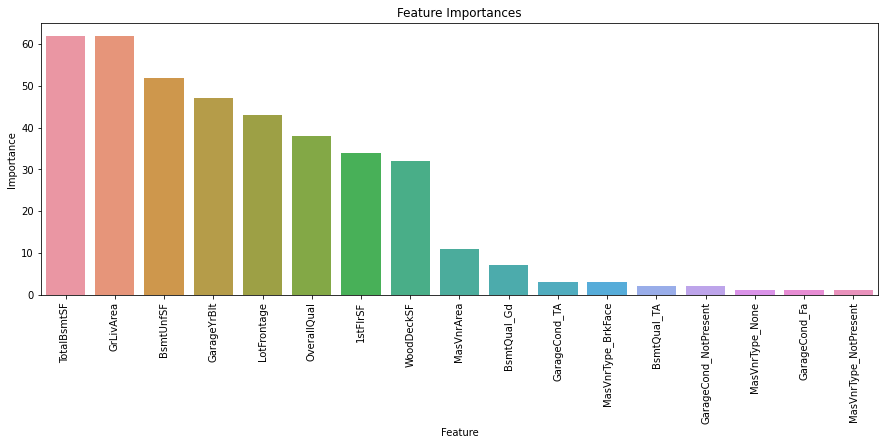

In [758]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [759]:
train_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.95,NaN,NaN,NaN
RMSE,17568.92,NaN,NaN,NaN
MAE,12522.49,NaN,NaN,NaN
MAPE,7.51,NaN,NaN,NaN


In [760]:
test_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.77,NaN,NaN,NaN
RMSE,39480.10,NaN,NaN,NaN
MAE,21738.79,NaN,NaN,NaN
MAPE,11.73,NaN,NaN,NaN


In [761]:
#Hyperparameter tuning - Iteration 1
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch1.fit(X_train_final,y_train)

gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.01248055, 0.01217818, 0.01294494, 0.01807346, 0.01840963,
         0.01716075, 0.02489314, 0.02356224, 0.02582445, 0.0382957 ,
         0.03169713, 0.02554922]),
  'std_fit_time': array([0.00074947, 0.00056958, 0.00057228, 0.00025207, 0.00027092,
         0.00061589, 0.00106848, 0.00077024, 0.00618847, 0.00779605,
         0.00704799, 0.00137543]),
  'mean_score_time': array([0.00216808, 0.00213423, 0.00241065, 0.00226183, 0.00243459,
         0.00221462, 0.00213256, 0.00217996, 0.00228872, 0.00226007,
         0.00204501, 0.00206013]),
  'std_score_time': array([1.86932427e-04, 3.57330835e-05, 1.02522429e-04, 1.20413647e-04,
         1.87963958e-04, 1.39542417e-04, 6.17758319e-05, 6.72993782e-05,
         2.29837073e-04, 1.47237447e-04, 3.00665646e-04, 1.10494436e-04]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, F

In [762]:
#Hyperparameter tuning - Iteration 2
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=5,
 min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch2.fit(X_train_final,y_train)

gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.0151988 , 0.01627026, 0.01727376, 0.01941571, 0.02031684,
         0.01884365, 0.02209039, 0.0215673 , 0.02055764]),
  'std_fit_time': array([0.00039379, 0.00068958, 0.00023599, 0.00084237, 0.00036599,
         0.00123235, 0.00170206, 0.00132631, 0.00052381]),
  'mean_score_time': array([0.0022037 , 0.00238647, 0.00260706, 0.00250564, 0.0028244 ,
         0.00259352, 0.00227442, 0.0023962 , 0.00233393]),
  'std_score_time': array([4.49498382e-05, 1.79149605e-04, 1.01298709e-04, 1.11737568e-04,
         2.20084117e-04, 3.40767064e-04, 1.47603831e-04, 1.96889152e-04,
         2.41135349e-04]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, 

In [763]:
#Hyperparameter tuning - Iteration 3
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch3.fit(X_train_final,y_train)

gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.02021151, 0.02172461, 0.02096987, 0.02058239, 0.02063918]),
  'std_fit_time': array([0.00046093, 0.00057751, 0.00050457, 0.00015612, 0.00086727]),
  'mean_score_time': array([0.00233016, 0.00267005, 0.00227127, 0.00243115, 0.00225654]),
  'std_score_time': array([1.32030397e-04, 1.93069593e-04, 5.58493371e-05, 5.70682647e-05,
         2.55773318e-04]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([-29957.62967661, -29957.62967661, -29957.62967661, -29957.62967661,
         -29957.62967661]),
  'split1_test_score': array([-38765.37299363, -38765.37299363, -38765.37299363, -38765.37299363,
         -38765.37299363]),
  'split2_test_score': array([-32116.220723, -32116.220723, -32116.220723, -32116.2207

In [764]:
#Initialize and fit the model
xgb2 = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
                        min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1,
                        objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27)
xgb2.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [765]:
#Get predictions
y_fit = xgb2.predict(X_train_final)
y_pred = xgb2.predict(X_test_final)

In [766]:
#Evaluate the Model
train_perf_hyp_tun["XGB2"] = get_evaluation_metrics(y_train,y_fit)
test_perf_hyp_tun["XGB2"] = get_evaluation_metrics(y_test,y_pred)

In [767]:
feature_importances = pd.Series(xgb2.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

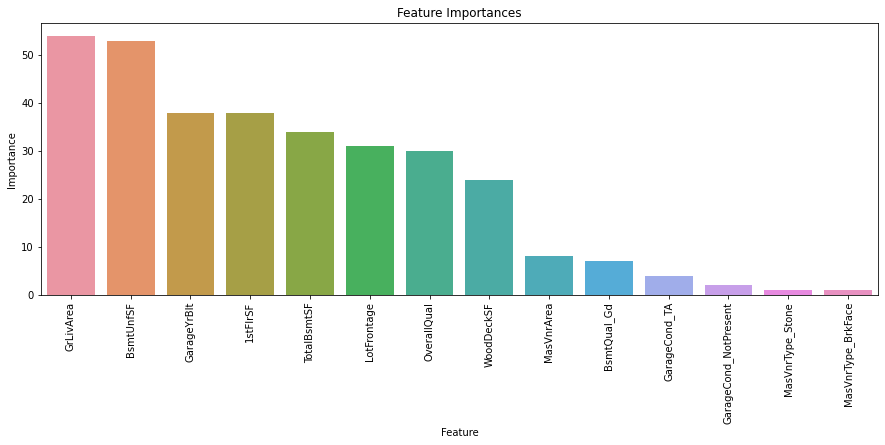

In [768]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [769]:
train_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.95,0.93,NaN,NaN
RMSE,17568.92,20757.62,NaN,NaN
MAE,12522.49,13749.42,NaN,NaN
MAPE,7.51,7.98,NaN,NaN


In [770]:
test_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.77,0.77,NaN,NaN
RMSE,39480.10,39510.57,NaN,NaN
MAE,21738.79,22565.42,NaN,NaN
MAPE,11.73,12.44,NaN,NaN


In [771]:
#Hyperparameter tuning - Iteration 4
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch4.fit(X_train_final,y_train)

gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.01574922, 0.01654782, 0.01709805, 0.01808167, 0.01658878,
         0.01657639, 0.01751428, 0.01817183, 0.01761055, 0.01807432,
         0.0182651 , 0.01856894, 0.01728435, 0.0175457 , 0.01897297,
         0.01881785]),
  'std_fit_time': array([0.000446  , 0.00052296, 0.00050263, 0.0004657 , 0.00050981,
         0.00036088, 0.000523  , 0.00075826, 0.00086778, 0.00039047,
         0.00056951, 0.00048574, 0.00043097, 0.00031959, 0.00045314,
         0.00077087]),
  'mean_score_time': array([0.00241795, 0.00238256, 0.00235119, 0.00239668, 0.00227132,
         0.00227141, 0.00227857, 0.00237007, 0.00232754, 0.00229259,
         0.00215449, 0.00228071, 0.00213833, 0.00224686, 0.00230365,
         0.00217228]),
  'std_score_time': array([1.40866817e-04, 1.40928607e-04, 1.71442727e-04, 1.36446151e-04,
         1.79991759e-04, 5.60945769e-05, 1.98786371e-04, 2.08504124e-04,
         1.04155099e-04, 9.93751289e-05, 5.55402924e-05, 1.20379521e-04,
         1.02451812e-

In [772]:
#Hyperparameter tuning - Iteration 5
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch5.fit(X_train_final,y_train)

gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.01884375, 0.01805797, 0.01831956, 0.01751189, 0.01729007,
         0.017419  , 0.01692553, 0.01725764, 0.01811314]),
  'std_fit_time': array([0.00030765, 0.00040994, 0.00029412, 0.00042798, 0.00033014,
         0.00032588, 0.0002481 , 0.00035906, 0.00079531]),
  'mean_score_time': array([0.00225801, 0.00235839, 0.00228505, 0.0021925 , 0.002179  ,
         0.00197268, 0.00207071, 0.00202708, 0.00207844]),
  'std_score_time': array([1.20177571e-04, 9.63076969e-05, 1.32213574e-04, 8.97357617e-05,
         9.65058331e-05, 4.31378214e-05, 9.18435158e-05, 1.01178553e-04,
         2.07413015e-04]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.85],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[F

In [773]:
#Hyperparameter tuning - Iteration 6
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch6.fit(X_train_final,y_train)

gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([0.02240553, 0.02066126, 0.02040682, 0.01745224, 0.01344724,
         0.0207726 , 0.02124758, 0.02100563, 0.01872754, 0.01425705,
         0.0198688 , 0.01974282, 0.01921282, 0.01699657, 0.01370745,
         0.01870179, 0.01952682, 0.01901212, 0.01708121, 0.01345654,
         0.01927266, 0.01883821, 0.01874943, 0.0169683 , 0.01340637]),
  'std_fit_time': array([0.00156992, 0.0005468 , 0.00057081, 0.00055919, 0.00041537,
         0.00030921, 0.00080073, 0.00090843, 0.0010401 , 0.00036308,
         0.00079519, 0.0005484 , 0.00027743, 0.00041673, 0.0004704 ,
         0.00036268, 0.00088911, 0.00042363, 0.00050875, 0.00042391,
         0.00048589, 0.00024094, 0.0007619 , 0.00046893, 0.00036314]),
  'mean_score_time': array([0.00229735, 0.00247302, 0.00224242, 0.00218654, 0.00210299,
         0.00234079, 0.00236664, 0.00226045, 0.00237384, 0.00229206,
         0.00246253, 0.00215445, 0.00206995, 0.00204425, 0.002105  ,
         0.00203342, 0.00220385, 0.0022202 , 0.

In [774]:
#Hyperparameter tuning - Iteration 7
param_test7 = {
    'reg_lambda':[1e-2, 0.05, 0.1, 0.5, 1, 1.5, 2, 5, 10]
}

gsearch7 = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)

gsearch7.fit(X_train_final,y_train)

gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([0.02231112, 0.01980515, 0.02059588, 0.01884618, 0.01786342,
         0.0170681 , 0.01681037, 0.01572042, 0.01513424]),
  'std_fit_time': array([0.00144233, 0.00032093, 0.00058689, 0.00023106, 0.00057338,
         0.00055178, 0.00030556, 0.00027305, 0.00025471]),
  'mean_score_time': array([0.00238166, 0.00239129, 0.00227156, 0.00224819, 0.00225458,
         0.00220528, 0.00221081, 0.0022243 , 0.00210438]),
  'std_score_time': array([1.12160533e-04, 1.20981434e-04, 1.13142174e-04, 8.42568155e-05,
         7.37943980e-05, 6.90908247e-05, 4.76349104e-05, 1.55695153e-04,
         1.79783330e-04]),
  'param_reg_lambda': masked_array(data=[0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 5, 10],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_lambda': 0.01},
   {'reg_lambda': 0.05},
   {'reg_lambda': 0.1},
   {'reg_lambda': 0.5},
   {'reg_lambda': 1},
 

In [775]:
#Initialize and fit the model
xgb3 = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        reg_alpha = 1e-5, reg_lambda = 1,objective= 'reg:squarederror', 
                        nthread=4, scale_pos_weight=1, seed=27)
xgb3.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [776]:
#Get predictions
y_fit = xgb3.predict(X_train_final)
y_pred = xgb3.predict(X_test_final)

In [777]:
#Evaluate the Model
train_perf_hyp_tun["XGB3"] = get_evaluation_metrics(y_train,y_fit)
test_perf_hyp_tun["XGB3"] = get_evaluation_metrics(y_test,y_pred)

In [778]:
feature_importances = pd.Series(xgb3.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

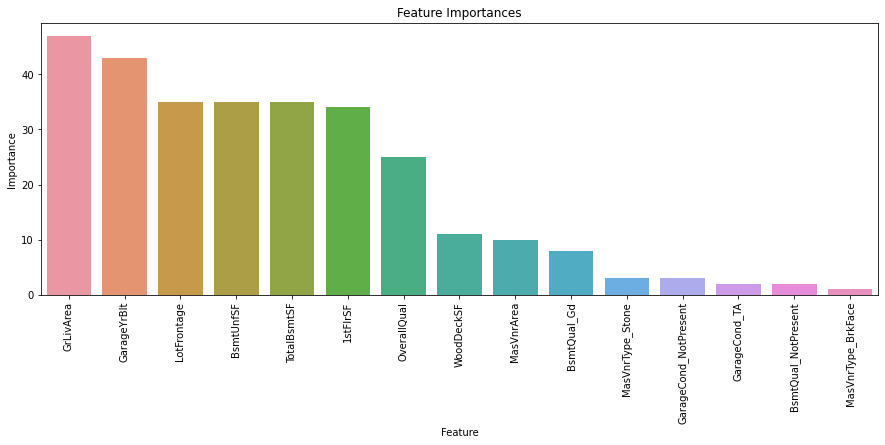

In [779]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [780]:
train_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.95,0.93,0.91,NaN
RMSE,17568.92,20757.62,23080.52,NaN
MAE,12522.49,13749.42,15095.75,NaN
MAPE,7.51,7.98,8.68,NaN


In [781]:
test_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.77,0.77,0.77,NaN
RMSE,39480.10,39510.57,40131.28,NaN
MAE,21738.79,22565.42,22628.23,NaN
MAPE,11.73,12.44,12.15,NaN


In [864]:
#Remove features that don't have high feature importance
trim_features = feat_imp_df.loc[:8,"Feature"].tolist()
trim_features

['GrLivArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'GarageYrBlt',
 'OverallQual',
 '1stFlrSF',
 'LotFrontage',
 'WoodDeckSF']

In [865]:
#Initialize and fit the model
xgb4 = xgb.XGBRegressor(learning_rate =0.3, n_estimators=10, max_depth=6,
                        min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
                        reg_alpha = 1e-5, reg_lambda = 1,objective= 'reg:squarederror', 
                        nthread=4, scale_pos_weight=1, seed=27)
xgb4.fit(X_train_final[trim_features], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4, nthread=4,
             num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [866]:
#Get predictions
y_fit = xgb4.predict(X_train_final[trim_features])
y_pred = xgb4.predict(X_test_final[trim_features])

In [867]:
#Evaluate the Model
train_perf_hyp_tun["XGB4"] = get_evaluation_metrics(y_train,y_fit)
test_perf_hyp_tun["XGB4"] = get_evaluation_metrics(y_test,y_pred)

In [868]:
feature_importances = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

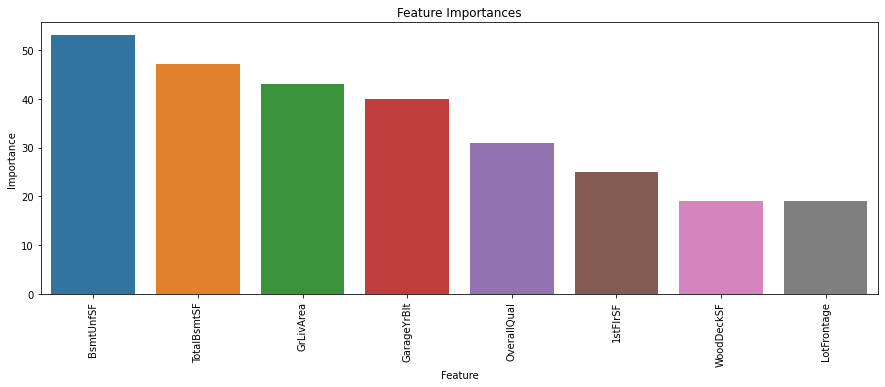

In [869]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [870]:
train_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.95,0.93,0.91,0.91
RMSE,17568.92,20757.62,23080.52,22901.83
MAE,12522.49,13749.42,15095.75,15355.08
MAPE,7.51,7.98,8.68,9.01


In [871]:
test_perf_hyp_tun

,XGB1,XGB2,XGB3,XGB4
R2 Score,0.77,0.77,0.77,0.78
RMSE,39480.10,39510.57,40131.28,39315.04
MAE,21738.79,22565.42,22628.23,21972.01
MAPE,11.73,12.44,12.15,12.01


## SHAP for Model Interpretability

In [253]:
#Import module
import shap

### Waterfall Plot

In [254]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf_regressor)

In [255]:
#Get SHAP values
shap_values = explainer(X_test_final)

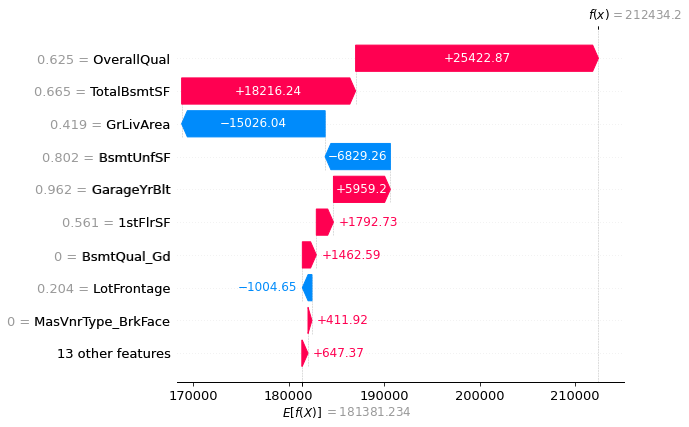

In [256]:
#Plot
idx = 10
explainer_waterfall = shap.Explanation(shap_values.values, shap_values.base_values[0][0], shap_values.data, feature_names=X_test_final.columns)
shap.plots.waterfall(explainer_waterfall[idx])

### Beeswarm plot

In [257]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf_regressor)

In [258]:
#Get SHAP values
shap_values = explainer(X_test_final)

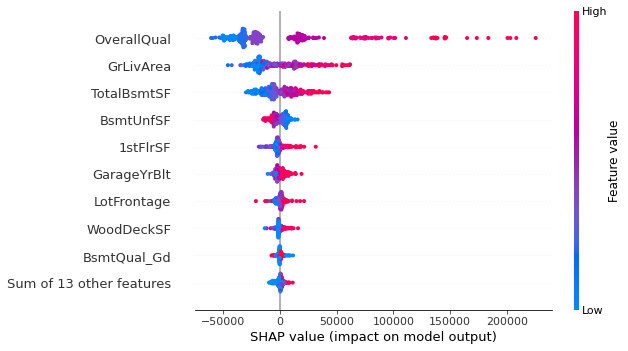

In [259]:
shap.plots.beeswarm(shap_values,show=False)

### Summary Plot

In [260]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf_regressor)

In [261]:
#Get interaction values
shap_interaction = explainer.shap_interaction_values(X_test_final)

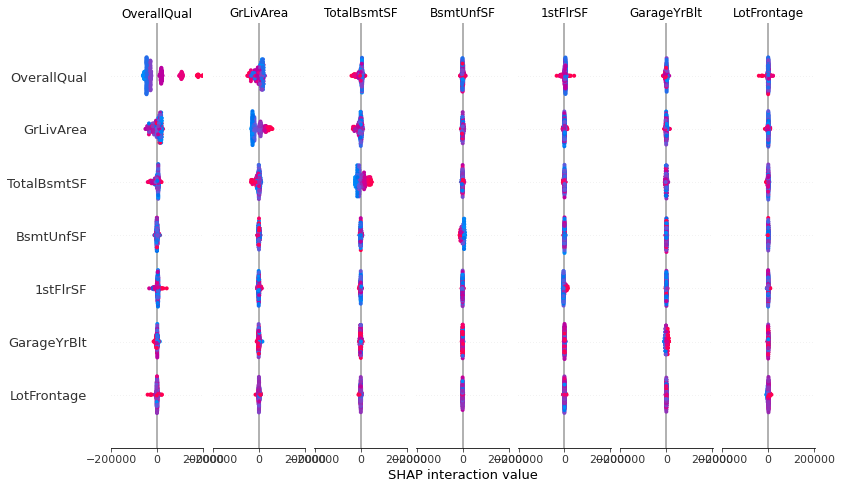

In [262]:
#Display summary plot
shap.summary_plot(shap_interaction, X_test_final, show=False)

### Dependence Plot

In [263]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf_regressor)

In [264]:
#Get interaction values
shap_interaction = explainer.shap_interaction_values(X_test_final)

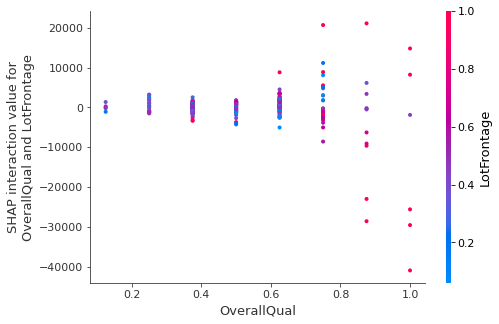

In [265]:
shap.dependence_plot(
    ("OverallQual", "LotFrontage"),
    shap_interaction, X_test_final,
    display_features=X_test_final,show=False)

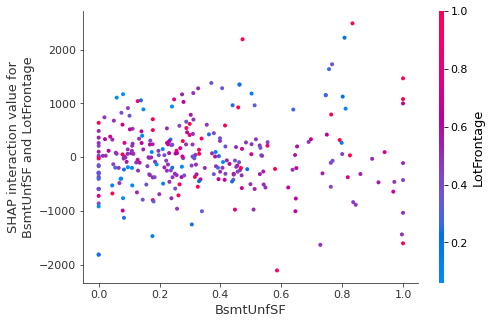

In [266]:
shap.dependence_plot(
    ("BsmtUnfSF", "LotFrontage"),
    shap_interaction, X_test_final,
    display_features=X_test_final,show=False)

### Force Plot

In [267]:
#Initialize Tree Explainer object
explainer = shap.TreeExplainer(rf_regressor)

In [268]:
#Calculate Shap values
instance_picked = X_test_final.loc[[0]]
shap_values = explainer.shap_values(instance_picked)

In [269]:
#Analyze using Forceplot 
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], instance_picked)

# Supervised Learning: Algorithms for Classification

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Classification</h1>
</div>

## Data

In [11]:
#Import dataset
df = pd.read_csv("datasets/winequality.csv")

In [37]:
#Columns to subset dataset
numeric_vars = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]
categ_vars = ['type']
target_var = 'quality'

In [38]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[numeric_vars+categ_vars], #Explanatory variables
    df[target_var], #Target variable
    test_size=0.2,  #Percentage of values in test set
    random_state=0, #Seed for reproducibility
)  

X_train.shape, X_test.shape

((3979, 12), (995, 12))

## Evaluation Metrics

In [39]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [40]:
#Initialize evaluation matrix
algorithms = ["LogReg", "KNN", "NaiveBayes", "SVM", "KernelSVM", "DecisionTree", \
              "RandomForest", "GradientBoosting", "AdaBoost","XGBoost", "LightGBM"]
eval_metrics = ["Accuracy","AUC-ROC", "Precision", "Recall", "F1Score"]

train_perf_clfn = pd.DataFrame(columns = algorithms, index=eval_metrics)
test_perf_clfn = pd.DataFrame(columns = algorithms, index=eval_metrics)

In [41]:
#Evaluation helper function
def get_evaluation_metrics_clfn(y_true, y_pred):
    
    #Evaluate the model using Accuracy
    accuracy = np.round(accuracy_score(y_true, y_pred),3)
    
    #Evaluate the model using AUC
    roc_auc = np.round(roc_auc_score(y_true, y_pred),3)
    
    #Evaluate the model using Precision
    precision = np.round(precision_score(y_true, y_pred),3)
    
    #Evaluate the model using Recall
    recall = np.round(recall_score(y_true, y_pred),3)
    
    #Evaluate the model using F1 Score
    f1score = np.round(f1_score(y_true, y_pred),3)

    return((accuracy, roc_auc, precision, recall, f1score))

## Feature Engineering

### Step 1: Simple Median Imputation

In [42]:
#Train-test split
X_train_impute_init = X_train[numeric_vars]
X_test_impute_init = X_test[numeric_vars]
X_train_impute_init.shape, X_test_impute_init.shape

((3979, 11), (995, 11))

In [43]:
#Check for missing values
X_train_impute_init[numeric_vars].isnull().sum()

fixed acidity           7
volatile acidity        4
citric acid             2
residual sugar          1
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      4
sulphates               2
alcohol                 0
dtype: int64

In [44]:
# Create an instance of SimpleImputer with median
imputer = SimpleImputer(strategy='median')

#Fit imputer to train set
imputer.fit(X_train_impute_init)

SimpleImputer(strategy='median')

In [45]:
#Let's see what the imputer learnt
imputer.statistics_

array([7.000e+00, 3.000e-01, 3.100e-01, 3.000e+00, 4.900e-02, 2.800e+01,
       1.200e+02, 9.954e-01, 3.200e+00, 5.100e-01, 1.000e+01])

In [46]:
#Validate with actual data
X_train_impute_init.median()

fixed acidity             7.0000
volatile acidity          0.3000
citric acid               0.3100
residual sugar            3.0000
chlorides                 0.0490
free sulfur dioxide      28.0000
total sulfur dioxide    120.0000
density                   0.9954
pH                        3.2000
sulphates                 0.5100
alcohol                  10.0000
dtype: float64

In [47]:
#Impute on training and test sets
X_train_arr = imputer.transform(X_train_impute_init)
X_test_arr = imputer.transform(X_test_impute_init)
X_train_arr

array([[ 7.   ,  0.27 ,  0.74 , ...,  3.04 ,  0.46 ,  9.2  ],
       [ 8.5  ,  0.655,  0.49 , ...,  3.31 ,  1.14 ,  9.3  ],
       [ 7.6  ,  0.25 ,  1.23 , ...,  3.03 ,  0.43 , 13.1  ],
       ...,
       [ 7.1  ,  0.26 ,  0.3  , ...,  3.19 ,  0.49 , 11.4  ],
       [ 7.2  ,  0.14 ,  0.32 , ...,  3.04 ,  0.67 , 10.   ],
       [ 6.8  ,  0.22 ,  0.3  , ...,  2.89 ,  0.42 ,  9.   ]])

In [48]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_imputed = pd.DataFrame(X_train_arr, columns=numeric_vars)
X_test_imputed = pd.DataFrame(X_test_arr, columns=numeric_vars)

In [49]:
X_train_imputed.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [50]:
X_test_imputed.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### Step 2: Outlier Handling

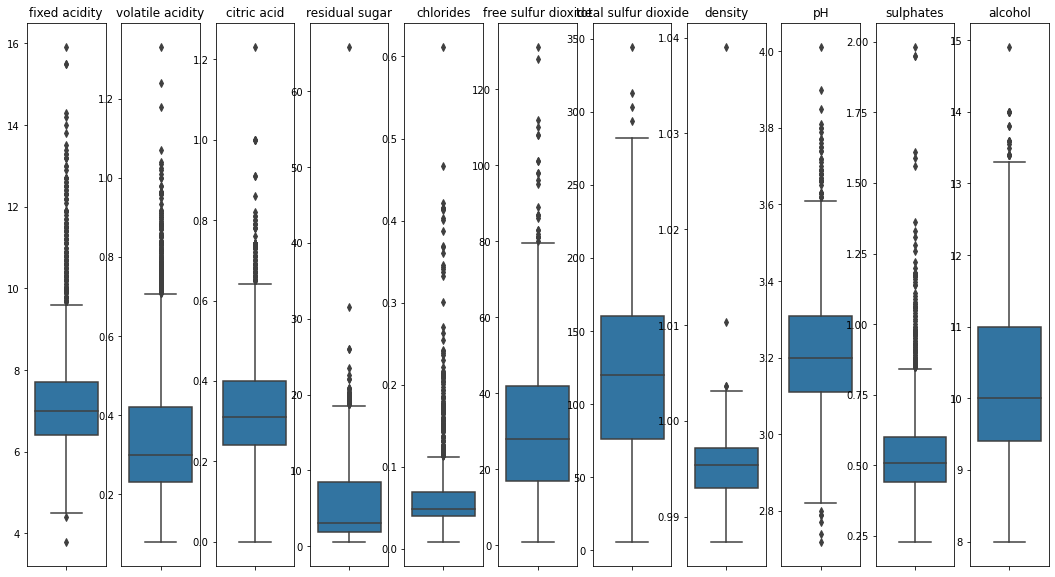

In [51]:
#Check for outliers using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_train_imputed[var])
    ax.set(ylabel = None)
    ax.set(title = var)

In [52]:
#Define function to get interquartile range and define boundaries
def get_boundaries(var):
    IQR = X_train_imputed[var].quantile(0.75) - X_train_imputed[var].quantile(0.25)
    lower_boundary = X_train_imputed[var].quantile(0.25) - (IQR * 1.5)
    upper_boundary = X_train_imputed[var].quantile(0.75) + (IQR * 1.5)
    return(lower_boundary, upper_boundary)

In [53]:
#Replace outliers by maximum and minimum limits
X_train_out_hand = X_train_imputed.copy(deep=True)
for var in numeric_vars:
    lower_boundary, upper_boundary = get_boundaries(var)
    X_train_out_hand[var] = np.where(X_train_out_hand[var] > upper_boundary, upper_boundary,
                            np.where(X_train_out_hand[var] < lower_boundary, lower_boundary,
                            X_train_out_hand[var]))

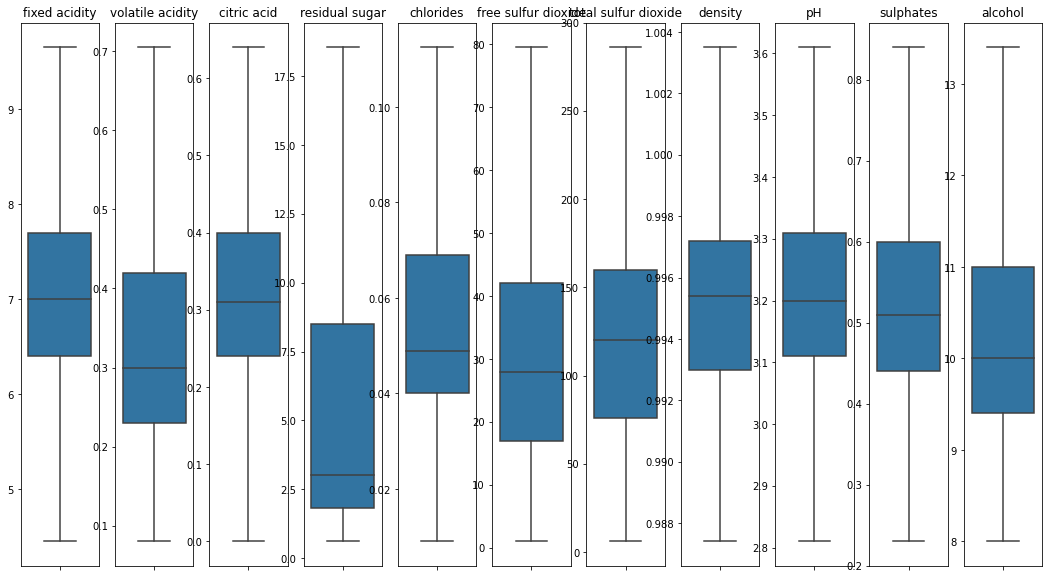

In [54]:
#Check for outliers using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_train_out_hand[var])
    ax.set(ylabel = None)
    ax.set(title = var)

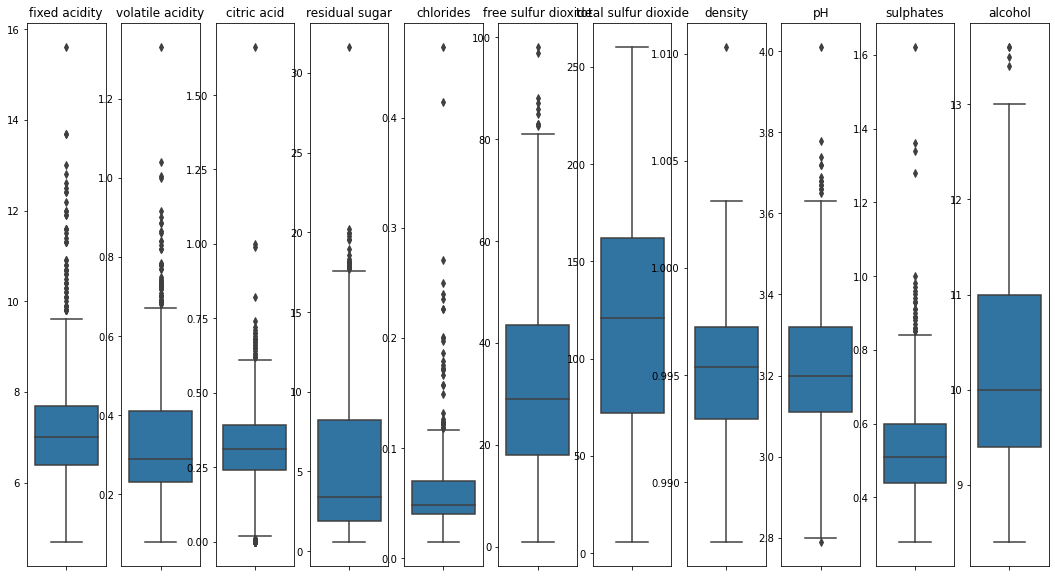

In [55]:
#Check for outliers in test set using boxplot
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_test_imputed[var])
    ax.set(ylabel = None)
    ax.set(title = var)

In [56]:
#Apply transformation on test set
X_test_out_hand = X_test_imputed.copy(deep=True)
for var in numeric_vars:
    lower_boundary, upper_boundary = get_boundaries(var)
    X_test_out_hand[var] = np.where(X_test_out_hand[var] > upper_boundary, upper_boundary,
                            np.where(X_test_out_hand[var] < lower_boundary, lower_boundary,
                            X_test_out_hand[var]))

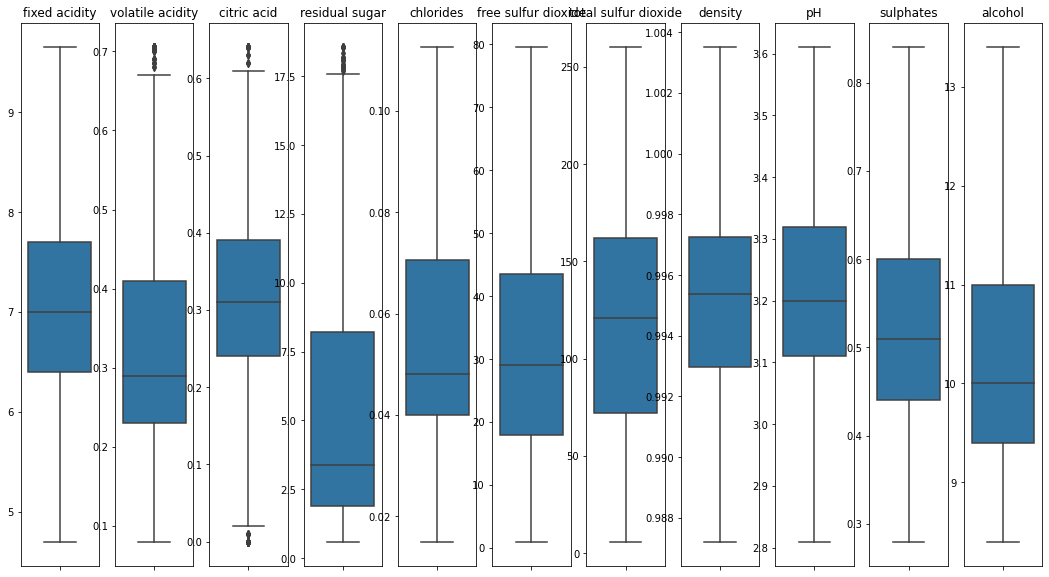

In [57]:
#Check for outliers in test set using boxplot - note that some outliers still exist!
plt.figure(figsize=(20,10))
for i, var in enumerate(numeric_vars):
    plt.subplot(1,len(numeric_vars)+1, (i+1))
    ax = sns.boxplot(y=X_test_out_hand[var])
    ax.set(ylabel = None)
    ax.set(title = var)

### Step 3: Minmax Feature Scaling

In [58]:
#Initialize the scaler
minmaxscaler = MinMaxScaler()

#Fit to train set
minmaxscaler.fit(X_train_out_hand)

MinMaxScaler()

In [59]:
#Transform train and test sets
X_train_scaled_arr = minmaxscaler.transform(X_train_out_hand)
X_test_scaled_arr = minmaxscaler.transform(X_test_out_hand)

In [60]:
#Check minimum values
minmaxscaler.min_

array([-8.55769231e-01, -1.28000000e-01,  0.00000000e+00, -3.34261838e-02,
       -8.69565217e-02, -1.27388535e-02, -2.14285714e-02, -6.13291925e+01,
       -3.51250000e+00, -3.77049180e-01, -1.48148148e+00])

In [61]:
#Check maximum values
minmaxscaler.data_max_

array([9.6500e+00, 7.0500e-01, 6.4000e-01, 1.8550e+01, 1.1250e-01,
       7.9500e+01, 2.8600e+02, 1.0035e+00, 3.6100e+00, 8.4000e-01,
       1.3400e+01])

In [62]:
#Check range
minmaxscaler.data_range_

array([5.200e+00, 6.250e-01, 6.400e-01, 1.795e+01, 1.035e-01, 7.850e+01,
       2.800e+02, 1.610e-02, 8.000e-01, 6.100e-01, 5.400e+00])

In [63]:
#Encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_out_hand.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_out_hand.columns)

In [64]:
#Check how data looks like
X_train_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000,3979.000000
mean,0.523233,0.421020,0.492460,0.279278,0.452761,0.374994,0.398290,0.478025,0.505557,0.482661,0.419556
std,0.202055,0.246298,0.224095,0.267529,0.214694,0.218926,0.205782,0.172706,0.193868,0.203575,0.197938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.240000,0.375000,0.066852,0.299517,0.203822,0.250000,0.347826,0.375000,0.344262,0.259259
50%,0.490385,0.352000,0.484375,0.133705,0.386473,0.343949,0.407143,0.496894,0.487500,0.459016,0.370370
75%,0.625000,0.544000,0.625000,0.440111,0.579710,0.522293,0.550000,0.608696,0.625000,0.606557,0.555556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
#Check how data looks like
X_test_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,0.523512,0.411996,0.483857,0.283929,0.446862,0.390046,0.401874,0.480186,0.503668,0.485229,0.417979
std,0.204882,0.236239,0.213506,0.266570,0.215690,0.224281,0.208885,0.175367,0.197145,0.206088,0.195500
min,0.048077,0.000000,0.000000,0.000000,0.057971,0.000000,0.000000,-0.011180,0.000000,0.081967,0.074074
25%,0.375000,0.240000,0.375000,0.072423,0.299517,0.216561,0.235714,0.345342,0.375000,0.344262,0.259259
50%,0.490385,0.336000,0.484375,0.155989,0.376812,0.356688,0.410714,0.495652,0.487500,0.459016,0.370370
75%,0.625000,0.528000,0.609375,0.423398,0.594203,0.541401,0.557143,0.611801,0.637500,0.606557,0.555556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.907143,1.000000,1.000000,1.000000,1.000000


### Step 4: One-Hot Encode Categorical Variables

In [66]:
#Subset only categorical variables
X_train_ohe_init = X_train[categ_vars]
X_test_ohe_init = X_test[categ_vars]

X_train_ohe_init.shape, X_test_ohe_init.shape

((3979, 1), (995, 1))

In [67]:
#Check for missing values
X_train_ohe_init.isnull().sum()

type    0
dtype: int64

In [68]:
#Create encoder instance
ohe_transorm = OneHotEncoder(categories='auto',
                       drop='first', #This drops the first variable
                       sparse=False,
                       handle_unknown='error') #For dealing with rare labels

ohe_transorm.fit(X_train_ohe_init.fillna('NotPresent'))

OneHotEncoder(drop='first', sparse=False)

In [69]:
#Check learned categories
ohe_transorm.categories_

[array(['red', 'white'], dtype=object)]

In [70]:
#Get feature names
feature_names = ohe_transorm.get_feature_names_out()
feature_names

array(['type_white'], dtype=object)

In [71]:
#Transform train set and test set
X_train_ohe_arr = ohe_transorm.transform(X_train_ohe_init.fillna('NotPresent'))
X_test_ohe_arr = ohe_transorm.transform(X_test_ohe_init.fillna('NotPresent'))

In [72]:
#Encode back into dataframe - make sure that column order is same as that before transformation!
X_train_ohe = pd.DataFrame(X_train_ohe_arr, columns=feature_names)
X_test_ohe = pd.DataFrame(X_test_ohe_arr, columns=feature_names)

In [73]:
X_train_ohe.head()

,type_white
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [74]:
X_test_ohe.head()

,type_white
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


### Step 5: Join Numeric and Categorical Data

In [75]:
X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.490385,0.304,1.000000,0.038997,1.000000,0.420382,0.410714,0.368944,0.2875,0.377049,0.222222
1,0.778846,0.920,0.765625,0.306407,1.000000,0.420382,0.517857,0.844720,0.6250,1.000000,0.240741
2,0.605769,0.272,1.000000,0.222841,0.251208,0.636943,1.000000,0.172671,0.2750,0.327869,0.944444
3,1.000000,0.432,0.765625,0.150418,0.589372,0.114650,0.110714,0.801242,0.6375,1.000000,0.555556
4,0.701923,0.224,0.671875,0.050139,0.338164,0.343949,0.439286,0.397516,0.5125,0.360656,0.555556


In [76]:
X_train_ohe.head()

,type_white
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [77]:
X_test_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.548077,0.208,0.515625,0.022284,0.270531,0.828025,0.492857,0.304348,0.3750,0.475410,0.407407
1,0.682692,0.288,0.437500,0.423398,0.280193,0.904459,0.700000,0.513043,0.3875,0.540984,0.370370
2,0.682692,0.272,0.203125,0.924791,0.260870,0.611465,0.760714,0.757764,0.1875,0.377049,0.314815
3,0.413462,0.272,0.390625,0.038997,0.299517,0.343949,0.282143,0.151553,0.0750,0.409836,0.592593
4,0.336538,0.272,0.750000,0.523677,0.338164,0.980892,0.835714,0.568323,0.5500,0.393443,0.277778


In [78]:
X_test_ohe.head()

,type_white
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [79]:
X_train_final = X_train_scaled.join(X_train_ohe)
X_test_final = X_test_scaled.join(X_test_ohe)

In [80]:
X_train_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,0.490385,0.304,1.000000,0.038997,1.000000,0.420382,0.410714,0.368944,0.2875,0.377049,0.222222,1.0
1,0.778846,0.920,0.765625,0.306407,1.000000,0.420382,0.517857,0.844720,0.6250,1.000000,0.240741,0.0
2,0.605769,0.272,1.000000,0.222841,0.251208,0.636943,1.000000,0.172671,0.2750,0.327869,0.944444,1.0
3,1.000000,0.432,0.765625,0.150418,0.589372,0.114650,0.110714,0.801242,0.6375,1.000000,0.555556,0.0
4,0.701923,0.224,0.671875,0.050139,0.338164,0.343949,0.439286,0.397516,0.5125,0.360656,0.555556,1.0


In [81]:
X_test_final.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,0.548077,0.208,0.515625,0.022284,0.270531,0.828025,0.492857,0.304348,0.3750,0.475410,0.407407,1.0
1,0.682692,0.288,0.437500,0.423398,0.280193,0.904459,0.700000,0.513043,0.3875,0.540984,0.370370,1.0
2,0.682692,0.272,0.203125,0.924791,0.260870,0.611465,0.760714,0.757764,0.1875,0.377049,0.314815,1.0
3,0.413462,0.272,0.390625,0.038997,0.299517,0.343949,0.282143,0.151553,0.0750,0.409836,0.592593,1.0
4,0.336538,0.272,0.750000,0.523677,0.338164,0.980892,0.835714,0.568323,0.5500,0.393443,0.277778,1.0


## Algorithms

### Logistic Regression

In [924]:
#Import Module
from sklearn.linear_model import LogisticRegression

In [925]:
#Initialize and fit the model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_final, y_train)

LogisticRegression(random_state=0)

In [926]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [927]:
#Evaluate the Model
train_perf_clfn["LogReg"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["LogReg"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [928]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [929]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### K-Nearest Neighbours

In [930]:
#Import Module
from sklearn.neighbors import KNeighborsClassifier

In [931]:
#Initialize and fit the model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_final, y_train)

KNeighborsClassifier()

In [932]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [933]:
#Evaluate the Model
train_perf_clfn["KNN"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["KNN"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [934]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.720,0.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.770,0.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [935]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.732,0.715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.795,0.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Naive Bayes

In [936]:
#Import Module
from sklearn.naive_bayes import GaussianNB

In [937]:
#Initialize and fit the model
classifier = GaussianNB()
classifier.fit(X_train_final, y_train)

GaussianNB()

In [938]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [939]:
#Evaluate the Model
train_perf_clfn["NaiveBayes"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["NaiveBayes"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [940]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.720,0.815,0.693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.770,0.858,0.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [941]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.732,0.715,0.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.795,0.747,0.643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Support Vector Machines

In [942]:
#Import Module
from sklearn.svm import SVC

In [943]:
#Initialize and fit the model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_final, y_train)

SVC(kernel='linear', random_state=0)

In [944]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [945]:
#Evaluate the Model
train_perf_clfn["SVM"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["SVM"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [946]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.720,0.815,0.693,0.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.770,0.858,0.670,0.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [947]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.732,0.715,0.679,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.795,0.747,0.643,0.783,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Kernel SVM

In [948]:
#Import Module
from sklearn.svm import SVC

In [949]:
#Initialize and fit the model
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_final, y_train)

SVC(random_state=0)

In [950]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [951]:
#Evaluate the Model
train_perf_clfn["KernelSVM"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["KernelSVM"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [952]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.720,0.815,0.693,0.720,0.751,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.770,0.858,0.670,0.766,0.809,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,NaN,NaN,NaN,NaN,NaN,NaN


In [953]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,NaN,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,NaN,NaN,NaN,NaN,NaN,NaN
Precision,0.732,0.715,0.679,0.728,0.744,NaN,NaN,NaN,NaN,NaN,NaN
Recall,0.795,0.747,0.643,0.783,0.792,NaN,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,NaN,NaN,NaN,NaN,NaN,NaN


### Decision Tree Classification

In [954]:
#Import Module
from sklearn.tree import DecisionTreeClassifier

In [955]:
#Initialize and fit the model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_final, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [956]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [957]:
#Evaluate the Model
train_perf_clfn["DecisionTree"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["DecisionTree"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [958]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,NaN,NaN,NaN,NaN,NaN
Precision,0.720,0.815,0.693,0.720,0.751,1.0,NaN,NaN,NaN,NaN,NaN
Recall,0.770,0.858,0.670,0.766,0.809,1.0,NaN,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,NaN,NaN,NaN,NaN,NaN


In [959]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,NaN,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,NaN,NaN,NaN,NaN,NaN
Precision,0.732,0.715,0.679,0.728,0.744,0.794,NaN,NaN,NaN,NaN,NaN
Recall,0.795,0.747,0.643,0.783,0.792,0.753,NaN,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,NaN,NaN,NaN,NaN,NaN


### Random Forest Classification

In [85]:
#Import Module
from sklearn.ensemble import RandomForestClassifier

In [961]:
#Initialize and fit the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [962]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [963]:
#Evaluate the Model
train_perf_clfn["RandomForest"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["RandomForest"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [964]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,0.990,NaN,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,0.990,NaN,NaN,NaN,NaN
Precision,0.720,0.815,0.693,0.720,0.751,1.0,0.993,NaN,NaN,NaN,NaN
Recall,0.770,0.858,0.670,0.766,0.809,1.0,0.989,NaN,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,0.991,NaN,NaN,NaN,NaN


In [965]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,0.783,NaN,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,0.783,NaN,NaN,NaN,NaN
Precision,0.732,0.715,0.679,0.728,0.744,0.794,0.831,NaN,NaN,NaN,NaN
Recall,0.795,0.747,0.643,0.783,0.792,0.753,0.781,NaN,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,0.805,NaN,NaN,NaN,NaN


### Gradient Boosting Classification

In [966]:
#Import Module
from sklearn.ensemble import GradientBoostingClassifier

In [967]:
#Initialize and fit the model
classifier = GradientBoostingClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train_final, y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [968]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [969]:
#Evaluate the Model
train_perf_clfn["GradientBoosting"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["GradientBoosting"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [970]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,0.990,0.701,NaN,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,0.990,0.685,NaN,NaN,NaN
Precision,0.720,0.815,0.693,0.720,0.751,1.0,0.993,0.711,NaN,NaN,NaN
Recall,0.770,0.858,0.670,0.766,0.809,1.0,0.989,0.799,NaN,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,0.991,0.752,NaN,NaN,NaN


In [971]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,0.783,0.696,NaN,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,0.783,0.681,NaN,NaN,NaN
Precision,0.732,0.715,0.679,0.728,0.744,0.794,0.831,0.714,NaN,NaN,NaN
Recall,0.795,0.747,0.643,0.783,0.792,0.753,0.781,0.787,NaN,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,0.805,0.749,NaN,NaN,NaN


### AdaBoost Classification

In [972]:
#Import Module
from sklearn.ensemble import AdaBoostClassifier

In [973]:
#Initialize and fit the model
classifier = AdaBoostClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train_final, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)

In [974]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [975]:
#Evaluate the Model
train_perf_clfn["AdaBoost"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["AdaBoost"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [976]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,0.990,0.701,0.698,NaN,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,0.990,0.685,0.681,NaN,NaN
Precision,0.720,0.815,0.693,0.720,0.751,1.0,0.993,0.711,0.705,NaN,NaN
Recall,0.770,0.858,0.670,0.766,0.809,1.0,0.989,0.799,0.805,NaN,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,0.991,0.752,0.752,NaN,NaN


In [977]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,0.783,0.696,0.705,NaN,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,0.783,0.681,0.687,NaN,NaN
Precision,0.732,0.715,0.679,0.728,0.744,0.794,0.831,0.714,0.716,NaN,NaN
Recall,0.795,0.747,0.643,0.783,0.792,0.753,0.781,0.787,0.806,NaN,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,0.805,0.749,0.758,NaN,NaN


### XGBoost Classification

In [978]:
#Import Module
# !pip install xgboost
import xgboost as xgb

In [979]:
#Initialize and fit the model
classifier = xgb.XGBClassifier(n_estimators = 10, random_state = 0, use_label_encoder=False)
classifier.fit(X_train_final, y_train)

[20:15:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [980]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [981]:
#Evaluate the Model
train_perf_clfn["XGBoost"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["XGBoost"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [982]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,0.990,0.701,0.698,0.818,NaN
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,0.990,0.685,0.681,0.814,NaN
Precision,0.720,0.815,0.693,0.720,0.751,1.0,0.993,0.711,0.705,0.837,NaN
Recall,0.770,0.858,0.670,0.766,0.809,1.0,0.989,0.799,0.805,0.845,NaN
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,0.991,0.752,0.752,0.841,NaN


In [983]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,0.783,0.696,0.705,0.743,NaN
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,0.783,0.681,0.687,0.733,NaN
Precision,0.732,0.715,0.679,0.728,0.744,0.794,0.831,0.714,0.716,0.763,NaN
Recall,0.795,0.747,0.643,0.783,0.792,0.753,0.781,0.787,0.806,0.801,NaN
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,0.805,0.749,0.758,0.782,NaN


### LightGBM Classification

In [984]:
#Import Module
# !pip install lightgbm
from lightgbm import LGBMClassifier

In [985]:
#Initialize and fit the model
classifier = LGBMClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train_final, y_train)

LGBMClassifier(n_estimators=10, random_state=0)

In [986]:
#Get predictions
y_fit = classifier.predict(X_train_final)
y_pred = classifier.predict(X_test_final)

In [987]:
#Evaluate the Model
train_perf_clfn["LightGBM"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn["LightGBM"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [988]:
train_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.699,0.808,0.643,0.697,0.738,1.0,0.990,0.701,0.698,0.818,0.777
AUC-ROC,0.688,0.801,0.639,0.686,0.727,1.0,0.990,0.685,0.681,0.814,0.763
Precision,0.720,0.815,0.693,0.720,0.751,1.0,0.993,0.711,0.705,0.837,0.771
Recall,0.770,0.858,0.670,0.766,0.809,1.0,0.989,0.799,0.805,0.845,0.865
F1Score,0.745,0.836,0.681,0.742,0.779,1.0,0.991,0.752,0.752,0.841,0.816


In [989]:
test_perf_clfn

,LogReg,KNN,NaiveBayes,SVM,KernelSVM,DecisionTree,RandomForest,GradientBoosting,AdaBoost,XGBoost,LightGBM
Accuracy,0.715,0.683,0.620,0.708,0.724,0.746,0.783,0.696,0.705,0.743,0.738
AUC-ROC,0.700,0.672,0.616,0.694,0.712,0.744,0.783,0.681,0.687,0.733,0.722
Precision,0.732,0.715,0.679,0.728,0.744,0.794,0.831,0.714,0.716,0.763,0.745
Recall,0.795,0.747,0.643,0.783,0.792,0.753,0.781,0.787,0.806,0.801,0.827
F1Score,0.762,0.731,0.661,0.755,0.767,0.773,0.805,0.749,0.758,0.782,0.784


## Hyperparameter Tuning - Random Forest

In [86]:
#Import module
from sklearn.model_selection import RandomizedSearchCV
import random
import warnings

warnings.filterwarnings('ignore')

In [87]:
#Initialize evaluation matrix for hyperparameters
iterations = ["RF1", "RF2", "RF3", "RF4"]
eval_metrics = ["Accuracy","AUC-ROC", "Precision", "Recall", "F1Score"]

train_perf_clfn_hyp_tun = pd.DataFrame(columns = iterations, index=eval_metrics)
test_perf_clfn_hyp_tun = pd.DataFrame(columns = iterations, index=eval_metrics)

In [88]:
#Initialize and fit the model
rf1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf1.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [89]:
#Get predictions
y_fit = rf1.predict(X_train_final)
y_pred = rf1.predict(X_test_final)

In [1061]:
#Evaluate the Model
train_perf_clfn_hyp_tun["RF1"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn_hyp_tun["RF1"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [1062]:
feature_importances = pd.Series(rf1.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

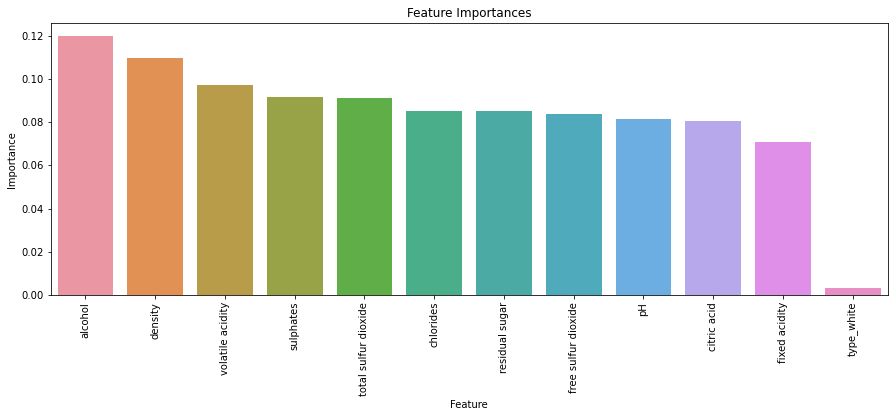

In [1063]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [1064]:
train_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.990,NaN,NaN,NaN
AUC-ROC,0.990,NaN,NaN,NaN
Precision,0.993,NaN,NaN,NaN
Recall,0.989,NaN,NaN,NaN
F1Score,0.991,NaN,NaN,NaN


In [1065]:
test_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.783,NaN,NaN,NaN
AUC-ROC,0.783,NaN,NaN,NaN
Precision,0.831,NaN,NaN,NaN
Recall,0.781,NaN,NaN,NaN
F1Score,0.805,NaN,NaN,NaN


In [1066]:
#Print out current parameters of Random Forest
from pprint import pprint
pprint(rf1.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [1067]:
#Set possible parameter values/space to search from
#Number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

#Number of features to consider at split
max_features = ['auto', 'sqrt']

#Maximum levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum samples required to split node
min_samples_split = [2, 5, 10]

#Minimum samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [1068]:
#Create base model to tune
rf_base = RandomForestClassifier()

In [1069]:
#Conduct random search of parameters
rf2 = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [1070]:
#Fit the random search model
rf2.fit(X_train_final, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   5.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   6.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   7.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   7.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   7.1s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   6.7s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1400; total time=   4.0s
[CV] END bootstrap=True, max_dep

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.9s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.7s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_fe

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END bootstrap=False, max_depth=80, max_f

[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   8.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   7.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, max_depth

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [1071]:
#Print out best parameters of Random Forest
rf2.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [1072]:
#Get predictions
y_fit = rf2.best_estimator_.predict(X_train_final)
y_pred = rf2.best_estimator_.predict(X_test_final)

In [1073]:
#Evaluate the Model
train_perf_clfn_hyp_tun["RF2"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn_hyp_tun["RF2"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [1074]:
feature_importances = pd.Series(rf2.best_estimator_.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

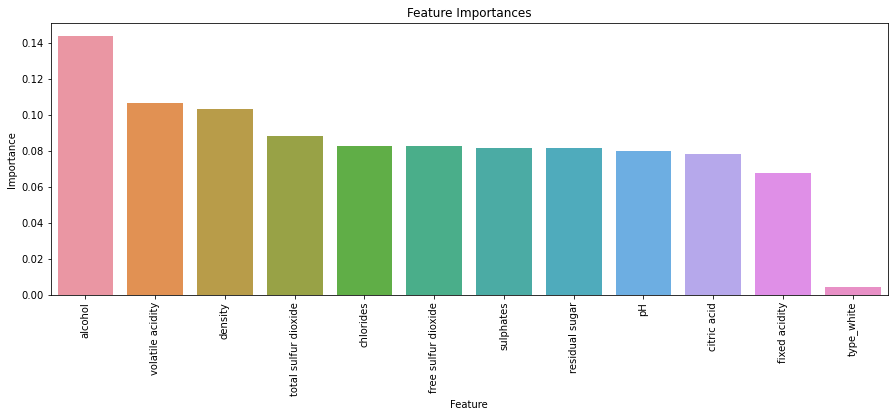

In [1075]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [1076]:
train_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.990,1.0,NaN,NaN
AUC-ROC,0.990,1.0,NaN,NaN
Precision,0.993,1.0,NaN,NaN
Recall,0.989,1.0,NaN,NaN
F1Score,0.991,1.0,NaN,NaN


In [1077]:
test_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.783,0.814,NaN,NaN
AUC-ROC,0.783,0.809,NaN,NaN
Precision,0.831,0.834,NaN,NaN
Recall,0.781,0.844,NaN,NaN
F1Score,0.805,0.839,NaN,NaN


In [1114]:
#Set possible parameter values/space to search from
#Number of trees
n_estimators = [int(x) for x in np.linspace(start = 900, stop = 1100, num = 10)]

#Maximum levels
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)

#Minimum samples required to split node
min_samples_split = [1,2,3]

#Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [900, 922, 944, 966, 988, 1011, 1033, 1055, 1077, 1100]}


In [1115]:
#Create base model to tune
rf_base2 = RandomForestClassifier()

In [1116]:
#Conduct random search of parameters
rf3 = RandomizedSearchCV(estimator = rf_base2, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [1117]:
#Fit the random search model
rf3.fit(X_train_final, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=1, n_estimators=966; total time=   0.2s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=1, n_estimators=966; total time=   0.2s
[CV] END max_depth=18, min_samples_leaf=4, min_samples_split=1, n_estimators=966; total time=   0.2s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=1077; total time=   0.3s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=1077; total time=   0.3s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=1077; total time=   0.3s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   3.4s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   3.2s
[CV] END max_depth=22, mi

[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=3, n_estimators=1055; total time=   3.4s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   3.0s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   2.9s
[CV] END max_depth=18, min_samples_leaf=1, min_samples_split=2, n_estimators=922; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=1, n_estimators=1100; total time=   0.2s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=900;

[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=1100; total time=   3.4s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=922; total time=   2.7s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=922; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=922; total time=   2.8s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=1, n_estimators=988; total time=   0.2s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=1, n_estimators=988; total time=   0.2s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=1, n_estimators=988; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=1, n_estimators=966; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=1, n_estimators=966; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=1, n_estimators=966; total ti

[CV] END max_depth=14, min_samples_leaf=4, min_samples_split=2, n_estimators=1033; total time=   2.9s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=2, n_estimators=922; total time=   2.7s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=2, n_estimators=922; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=2, n_estimators=922; total time=   2.7s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1055; total time=   3.7s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1055; total time=   3.2s
[CV] END max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=1055; total time=   3.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=1100; to

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 12, 14, 16, 18, 20,
                                                      22, 24, 26, 28, 30,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [900, 922, 944, 966,
                                                         988, 1011, 1033, 1055,
                                                         1077, 1100]},
                   random_state=42, verbose=2)

In [1118]:
#Print out best parameters of Random Forest
rf3.best_params_

{'n_estimators': 1033,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 24}

In [1119]:
#Get predictions
y_fit = rf3.best_estimator_.predict(X_train_final)
y_pred = rf3.best_estimator_.predict(X_test_final)

In [1120]:
#Evaluate the Model
train_perf_clfn_hyp_tun["RF3"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn_hyp_tun["RF3"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [1121]:
feature_importances = pd.Series(rf3.best_estimator_.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

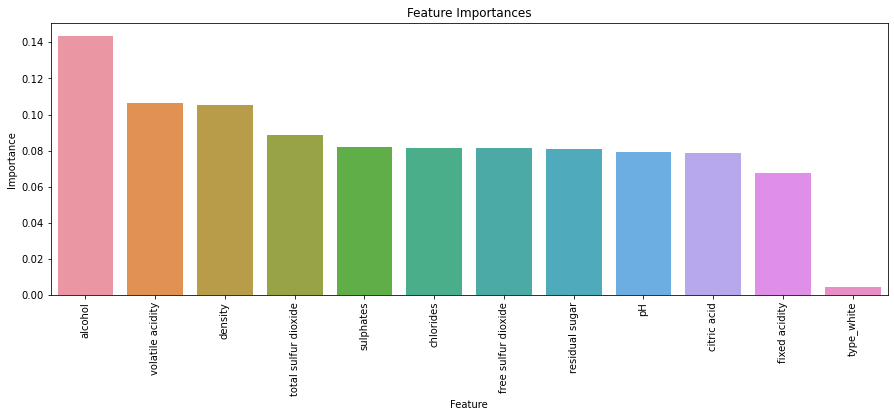

In [1122]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [1123]:
train_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.990,1.0,1.0,NaN
AUC-ROC,0.990,1.0,1.0,NaN
Precision,0.993,1.0,1.0,NaN
Recall,0.989,1.0,1.0,NaN
F1Score,0.991,1.0,1.0,NaN


In [1124]:
test_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.783,0.814,0.811,NaN
AUC-ROC,0.783,0.809,0.806,NaN
Precision,0.831,0.834,0.833,NaN
Recall,0.781,0.844,0.839,NaN
F1Score,0.805,0.839,0.836,NaN


In [1126]:
#Remove features that don't have high feature importance
trim_features = feat_imp_df.loc[:10,"Feature"].tolist()
trim_features

['alcohol',
 'volatile acidity',
 'density',
 'total sulfur dioxide',
 'sulphates',
 'chlorides',
 'free sulfur dioxide',
 'residual sugar',
 'pH',
 'citric acid',
 'fixed acidity']

In [1127]:
#Initialize and fit the model
rf4 = RandomForestClassifier(n_estimators= 666,min_samples_split= 10,min_samples_leaf= 4,max_depth= 94, max_features = 'sqrt', bootstrap=False)

In [1128]:
#Fit the random search model
rf4.fit(X_train_final[trim_features], y_train)

RandomForestClassifier(bootstrap=False, max_depth=94, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=666)

In [1129]:
#Get predictions
y_fit = rf4.predict(X_train_final[trim_features])
y_pred = rf4.predict(X_test_final[trim_features])

In [1130]:
#Evaluate the Model
train_perf_clfn_hyp_tun["RF4"] = get_evaluation_metrics_clfn(y_train,y_fit)
test_perf_clfn_hyp_tun["RF4"] = get_evaluation_metrics_clfn(y_test,y_pred)

In [1131]:
feature_importances = pd.Series(rf4.feature_importances_, index=trim_features).sort_values(ascending=False)
feat_imp_df = feature_importances.to_frame(name="Importance").rename_axis("Feature").reset_index()

Text(0.5, 1.0, 'Feature Importances')

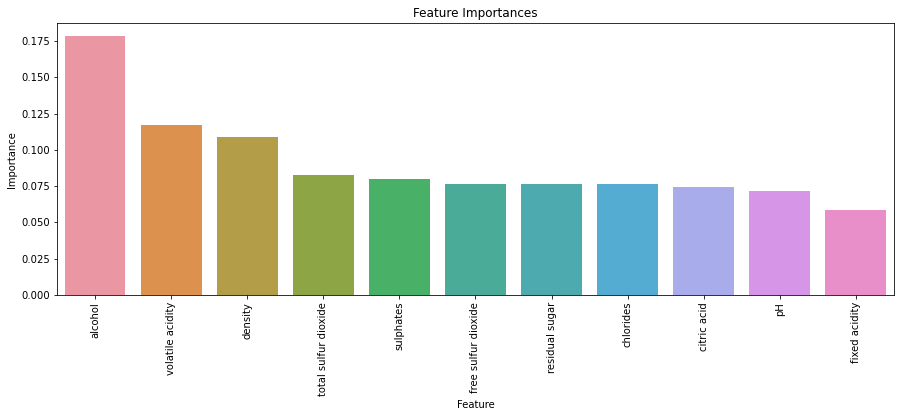

In [1132]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feat_imp_df, x = "Feature", y="Importance")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [1133]:
train_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.990,1.0,1.0,0.986
AUC-ROC,0.990,1.0,1.0,0.985
Precision,0.993,1.0,1.0,0.983
Recall,0.989,1.0,1.0,0.993
F1Score,0.991,1.0,1.0,0.988


In [1134]:
test_perf_clfn_hyp_tun

,RF1,RF2,RF3,RF4
Accuracy,0.783,0.814,0.811,0.805
AUC-ROC,0.783,0.809,0.806,0.798
Precision,0.831,0.834,0.833,0.821
Recall,0.781,0.844,0.839,0.844
F1Score,0.805,0.839,0.836,0.833


## SHAP for Model Interpretability

In [124]:
#Import module
import shap

### Waterfall Plot

In [160]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(rf1)

In [161]:
#Get SHAP values
shap_values = explainer(X_test_final)

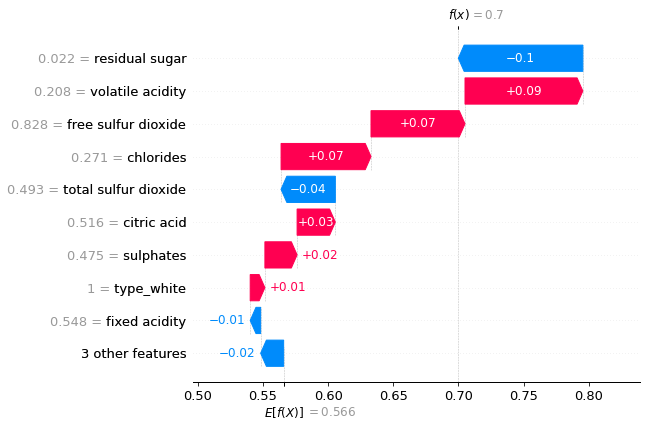

In [162]:
#Plot
idx = 0
explanation = shap.Explanation(shap_values.values[:,:,1], shap_values.base_values[:,1], feature_names=X_test_final.columns, data = X_test_final.values)
shap.plots.waterfall(explanation[idx])

### Beeswarm plot

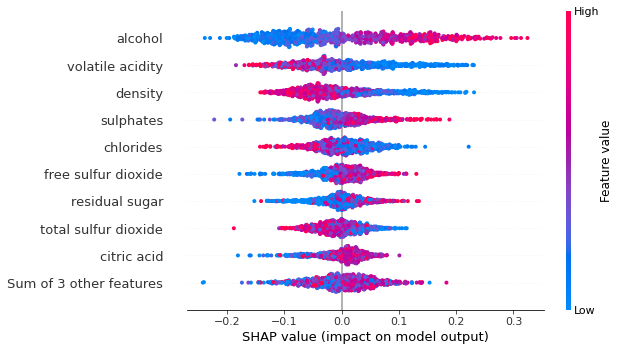

In [163]:
#Plot
shap.plots.beeswarm(explanation,show=False)

### Summary Plot

In [167]:
#Get interaction values
shap_interaction = explainer.shap_interaction_values(X_test_final.loc[0])

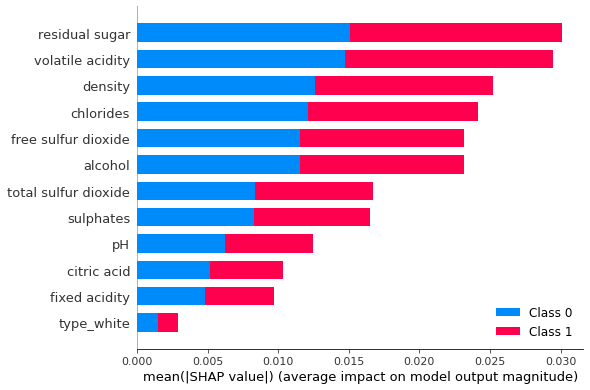

In [168]:
#Display summary plot
shap.summary_plot(shap_interaction, X_test_final)

### Force Plot

In [175]:
#Initialize Tree Explainer object
explainer = shap.TreeExplainer(rf1)

In [176]:
#Calculate Shap values
instance_picked = X_test_final.loc[[0]]
shap_values = explainer.shap_values(instance_picked)

In [177]:
#Analyze using Forceplot 
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], instance_picked)

# Unsupervised Learning

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Unsupervised Learning</h1>
</div>

## Clustering

In [12]:
#Import dataset
df = pd.read_csv("datasets/customers.csv")

In [437]:
#Define cluster data
cluster_df = df.iloc[:, [3, 4]].values

### K-Means Clustering

In [306]:
#Import Module
from sklearn.cluster import KMeans

In [307]:
#Use  elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

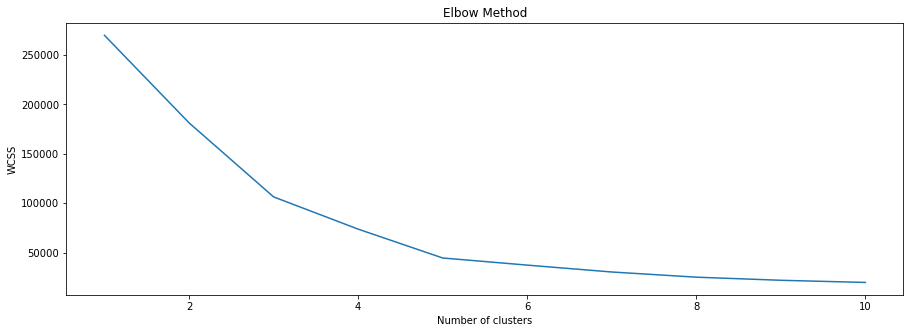

In [308]:
#Plot
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [309]:
#Train K-Means model on dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_df)

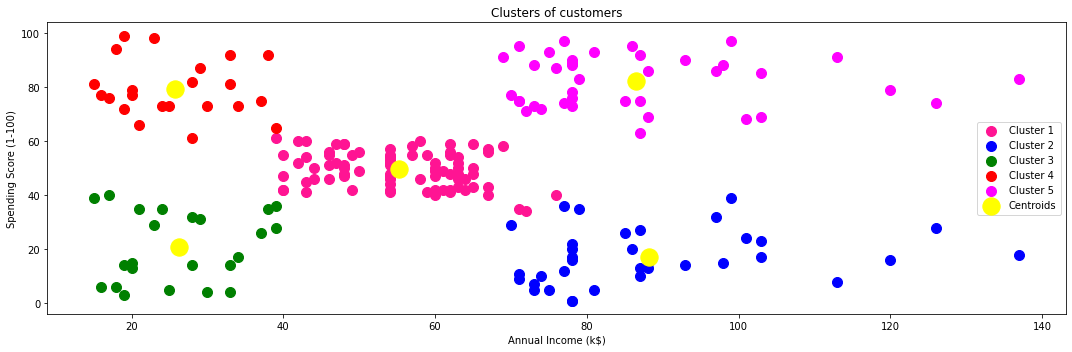

In [310]:
#Visualize clusters
plt.figure(figsize=(15,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'deeppink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()

### Hierarchical Clustering

In [311]:
#Import Module
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

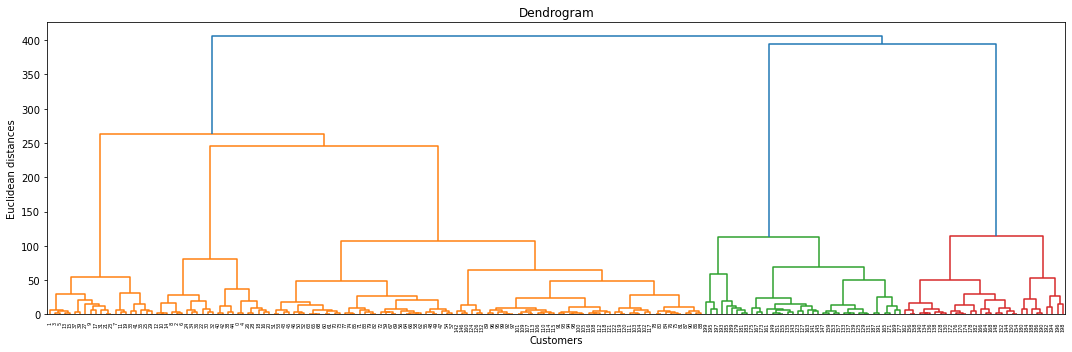

In [312]:
#Use dendrogram to find optimal number of clusters
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.tight_layout()

In [313]:
#Train Hierarchical Clustering model on dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

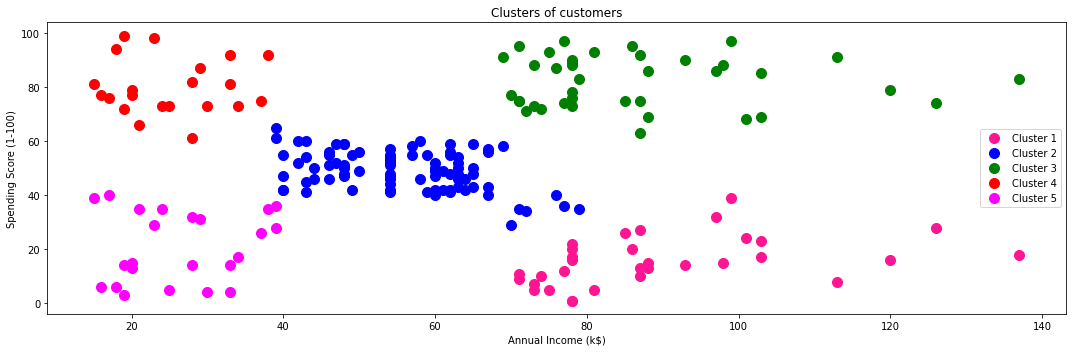

In [314]:
#Visualize the clusters
plt.figure(figsize=(15,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'deeppink', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.tight_layout()

## Association Rule Mining

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Association Rule Mining</h1>
</div>

In [13]:
#Import dataset
df = pd.read_csv("datasets/market_basket.csv", header=None)

In [316]:
#Data preprocessing
transactions = []
for i in range(0, 7501):
  transactions.append([str(df.values[i,j]) for j in range(0, 20)])

### Apriori Algorithm

In [317]:
#Import module
# !pip install apyori
from apyori import apriori

In [318]:
## Training the Apriori model on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [319]:
#Visualize the results
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [320]:
#Put results into Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
#Display by descending lift values
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


### ECLAT Algorithm

In [321]:
#Train Eclat model on the dataset
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [322]:
#Visualize results
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [323]:
#Put results into Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200


## Dimensionality Reduction

<div class="alert alert-info" style="background-color:#6C5B7B; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:10px 5px'>Dimensionality Reduction</h1>
</div>

In [408]:
#Import common modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger

import warnings
warnings.filterwarnings('ignore')
matplotlib_axes_logger.setLevel('ERROR')

In [14]:
#Import dataset
dataset = pd.read_csv('datasets/wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [410]:
#Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [411]:
#Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Principal Component Analysis

In [412]:
#Import Module
from sklearn.decomposition import PCA

In [413]:
#Conduct PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [414]:
## Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [415]:
#Get predictions
y_pred = classifier.predict(X_test)

In [416]:
#Make Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [417]:
#Get accuracy
accuracy_score(y_test, y_pred)

0.9722222222222222

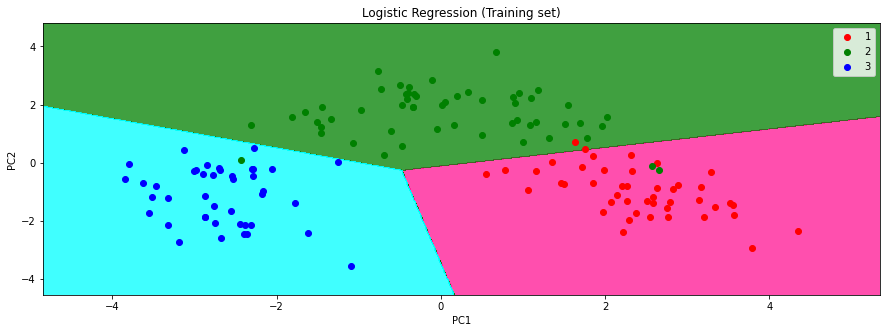

In [418]:
#Visualize training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

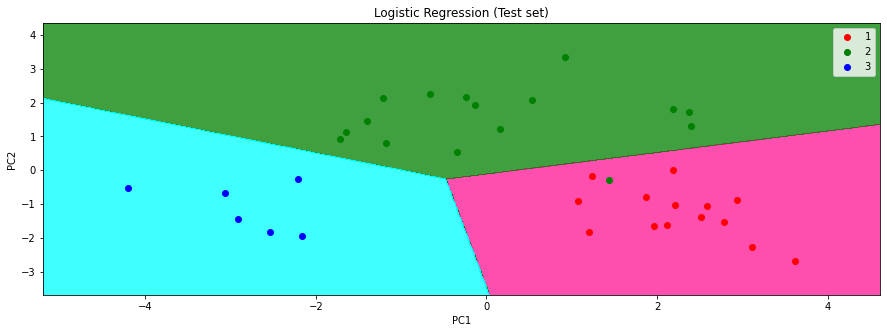

In [419]:
#Visualize test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

### Linear Discriminant Analysis

In [420]:
#Import Module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [421]:
#Conduct LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [422]:
#Training Logistic Regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [423]:
#Get predictions
y_pred = classifier.predict(X_test)

In [424]:
#Make Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [425]:
#Get accuracy
accuracy_score(y_test, y_pred)

0.9722222222222222

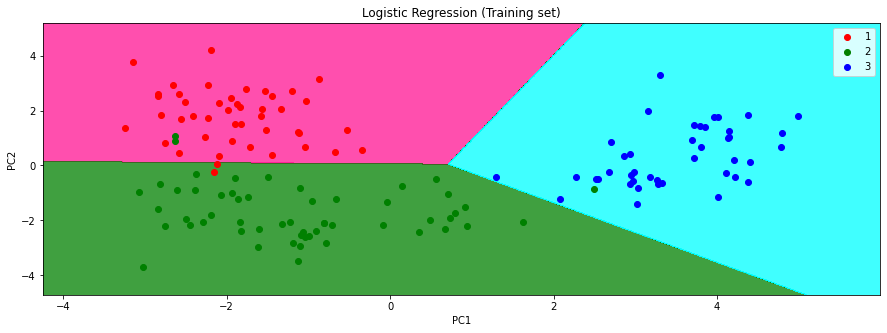

In [426]:
#Visualize training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

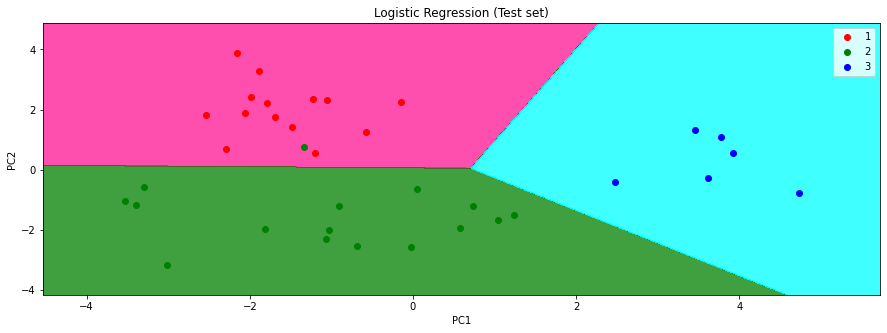

In [427]:
#Visualize test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

### Kernel PCA

In [428]:
# Import Module
from sklearn.decomposition import KernelPCA

In [429]:
#Conduct Kernel PCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [430]:
#Train Logistic Regression model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [431]:
#Get predictions
y_pred = classifier.predict(X_test)

In [432]:
#Make Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [433]:
#Get accuracy
accuracy_score(y_test, y_pred)

0.9722222222222222

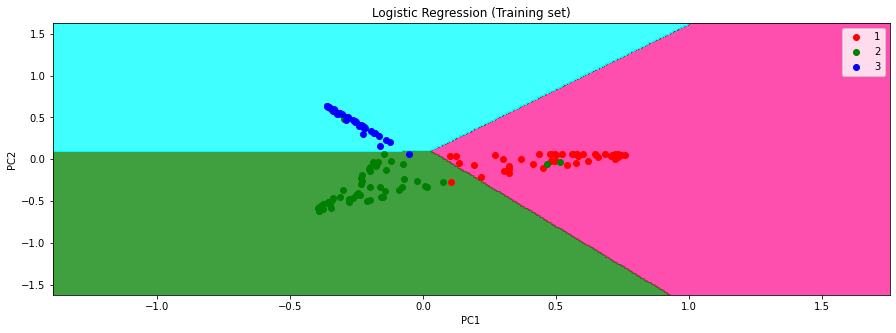

In [434]:
#Visualize training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

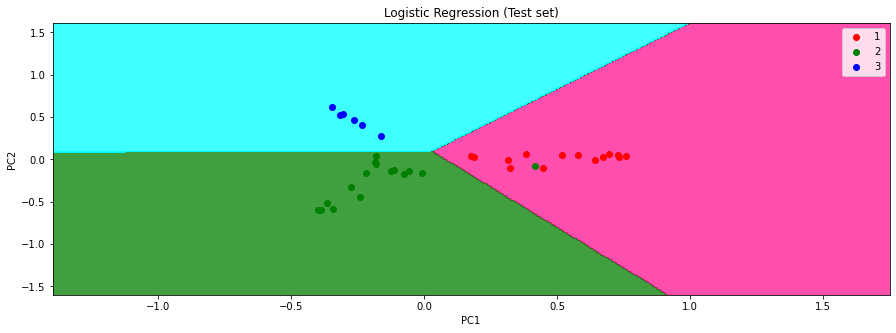

In [435]:
#Visualize test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

#Plot
plt.figure(figsize=(15,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('deeppink', 'green', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()